# Import crucial libraries for plotting and exploring data

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

<p>Moreover, the link to the Airline data set already contains a test.csv and train.csv set which is not normally the case. Beacause
a dataset usually comes on its own and it will be split once we get to the Data Analysis stage, where identifying a model for predictions/classfications requires the data to be split into a training and a test set. So to solve this problem we will merge the train and test set together using the pd.concat() </p>

<h3>For good practice, we normally replace whitespace character in columns' names with '_'</h3>

In [3]:
Training_Data = pd.read_csv('train.csv', encoding = 'utf-8')
Training_Data.columns = Training_Data.columns.str.replace(' ', '_')

Testing_Data = pd.read_csv('test.csv', encoding = 'utf-8')
Testing_Data.columns = Testing_Data.columns.str.replace(' ', '_')

Full_Set = pd.concat([Training_Data, Testing_Data]).reset_index(drop=True)

## Execute the code below to create a csv file named output.csv containing all the data.

In [4]:
Full_Set.to_csv('output.csv', index=False)

<h4>We will refer to the the 'Training_Data' and 'Testing_Data' later on when we reach the model identification process.
For now, we'll use 'Full_Set' data for EDA.</h4>

In [5]:
Full_Set
Full_Set.head()

Unnamed:_0      id  Gender      Customer_Type  Age   Type_of_Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight_Distance  Inflight_wifi_service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival_time_convenient  ...  Inflight_entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight_service  Cleanliness  Departure_Delay_in_Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival_Delay_in_Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [6]:
Full_Set.tail()

Unnamed:_0     id  Gender      Customer_Type  Age   Type_of_Travel  \
129875       25971  78463    Male  disloyal Customer   34  Business travel   
129876       25972  71167    Male     Loyal Customer   23  Business travel   
129877       25973  37675  Female     Loyal Customer   17  Personal Travel   
129878       25974  90086    Male     Loyal Customer   14  Business travel   
129879       25975  34799  Female     Loyal Customer   42  Personal Travel   

           Class  Flight_Distance  Inflight_wifi_service  \
129875  Business              526                      3   
129876  Business              646                      4   
129877       Eco              828                      2   
129878  Business             1127                      3   
129879       Eco              264                      2   

        Departure/Arrival_time_convenient  ...  Inflight_entertainment  \
129875                                  3  ...                       4   
129876                                  4  ...                       4   
129877                                  5  ...                       2   
129878                                  3  ...                       4   
129879                                  5  ...                       1   

        On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
129875                 3                 2                 4                4   
129876                 4                 5                 5                5   
129877                 4                 3                 4                5   
129878                 3                 2                 5                4   
129879                 1                 2                 1                1   

        Inflight_service  Cleanliness  Departure_Delay_in_Minutes  \
129875                 5            4                           0   
129876                 5            4                           0   
129877                 4            2                           0   
129878                 5            4                           0   
129879                 1            1                           0   

        Arrival_Delay_in_Minutes             satisfaction  
129875                       0.0  neutral or dissatisfied  
129876                       0.0                satisfied  
129877                       0.0  neutral or dissatisfied  
129878                       0.0                satisfied  
129879                       0.0  neutral or dissatisfied  

[5 rows x 25 columns]

# Understanding the data

In [7]:
Full_Set.shape

(129880, 25)

In [8]:
Full_Set.columns

Index(['Unnamed:_0', 'id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel',
       'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [9]:
Full_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed:_0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer_Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type_of_Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight_Distance                    129880 non-null  int64  
 8   Inflight_wifi_service              129880 non-null  int64  
 9   Departure/Arrival_time_convenient  129880 non-null  int64  
 10  Ease_of_Online_booking             129880 non-null  int64  
 11  Gate_location                      1298

### Dropping the first column

In [10]:
Full_Set.drop('Unnamed:_0', axis=1, inplace=True)

In [11]:
Full_Set.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

# Repeat the above processes again to check that we've removed the 'Unnamed:_0' column

In [12]:
Full_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer_Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type_of_Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight_Distance                    129880 non-null  int64  
 7   Inflight_wifi_service              129880 non-null  int64  
 8   Departure/Arrival_time_convenient  129880 non-null  int64  
 9   Ease_of_Online_booking             129880 non-null  int64  
 10  Gate_location                      129880 non-null  int64  
 11  Food_and_drink                     1298

In [13]:
Full_Set.dtypes

id                                     int64
Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_De

<h1>Analysis on the dataset's features</h1>


<h3>We will recall the definition of numerical and categorical variables then classify those features as one of the two and then perform futher analysis and testing. 

- Numerical features: Numerical features are variables that have a numeric value. They can be either discrete or continuous. Discrete numerical features are those that have a finite number of possible values (e.g. number of bedrooms in a house), while continuous numerical features can take any value within a range (e.g. height or weight). Examples of numerical features in our dataset include Flight_Distance, Age, Inflight_wifi_service, Departure_Delay_in_Minutes, and Arrival_Delay_in_Minutes.

- Categorical features: Categorical features are variables that have a limited number of values. They can be further classified into nominal and ordinal variables. Nominal variables are those that do not have an inherent order or rank (e.g. gender or type of travel), while ordinal variables have a specific order or rank (e.g. rating on a scale of 1-5). Examples of categorical features in our dataset include Gender, Customer_Type, Type_of_Travel, Class, and satisfaction, as well as the various service ratings such as Inflight_wifi_service and Cleanliness.</h3>

#### Now we won't do the grouping yet, we will use the pre-grouped data 'Full_Set' in our Correlation Analysis and see what happens.

# Correlation Analysis

<h4>To perform correlation analysis, we can use the corr() function to calculate the correlation matrix between all pairs of columns in the data set. Then we can use a data visualization tools such as heatmaps and scatterplots to better understand the relationships between the variables.</h4>

In [14]:
# calculate the correlation matrix
corr_matrix = Full_Set.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_31280\211183477.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Full_Set.corr()


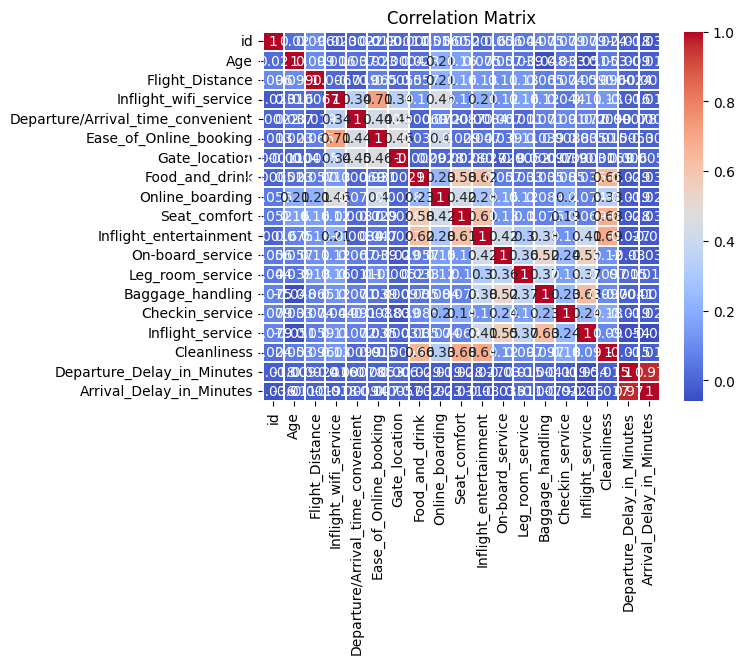

In [15]:
# plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.25)
plt.title('Correlation Matrix')
plt.show()

<p>As we can see that it is very difficult to read what's going on in the above heat map. Therefore, it is important to note that we need to identify the data type of our features clearly before diving too deep into the further analysis.</p>

<h3>Here is the grouping of our features into numerical and categorical type: </h3>

Categorical Features:
<ul>
  <li>Gender</li>
  <li>Customer_Type</li>
  <li>Type_of_Travel</li>
  <li>Class</li>
  <li>satisfaction</li>
</ul>



Numerical Features:
<ul>
  <li>Age</li>
  <li>Flight_Distance</li>
  <li>Inflight_wifi_service</li>
  <li>Departure/Arrival_time_convenient</li>
  <li>Ease_of_Online_booking</li>
  <li>Gate_location</li>
  <li>Food_and_drink</li>
  <li>Online_boarding</li>
  <li>Inflight_entertainment</li>
  <li>On-board_service</li>
  <li>Leg_room_service</li>
  <li>Baggage_handling</li>
  <li>Checkin_service</li>
  <li>Inflight_service</li>
  <li>Cleanliness</li>
  <li>Departure_Delay_in_Minutes</li>
  <li>Arrival_Delay_in_Minutes</li>
</ul>


In [24]:
numerical_cols = ['id', 'Age', 'Flight_Distance','Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

In [25]:
categorical_cols = Full_Set.select_dtypes(include='category')

In [26]:
Full_Set[categorical_cols.columns.tolist()] = Full_Set[categorical_cols.columns.tolist()].astype('category')

##### Use the above columns for testing numerical and categorical features

In [27]:
Full_Set.dtypes

id                                     int64
Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_De

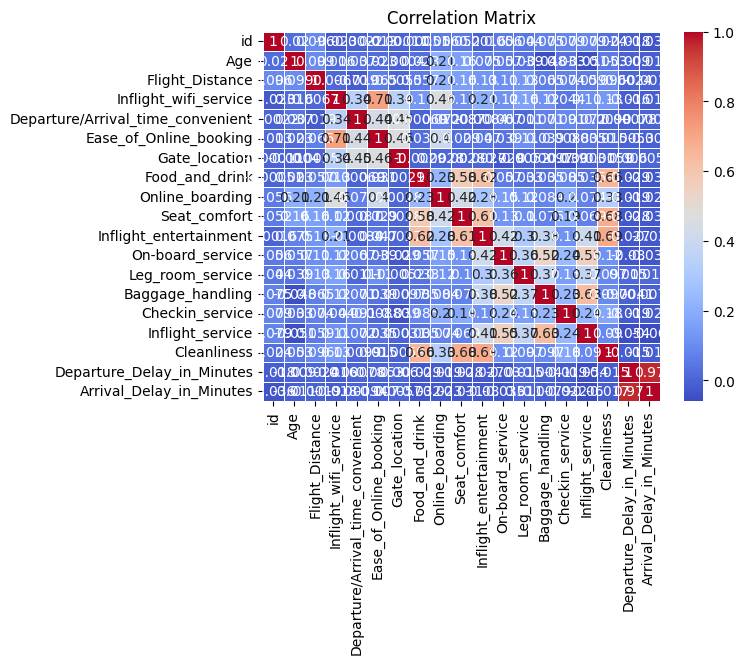

In [28]:
corr_matrix = Full_Set.corr(numeric_only=True)
# plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Well it certainly got better but we need to make some more adjustments to the parameters of the heatmap plots.

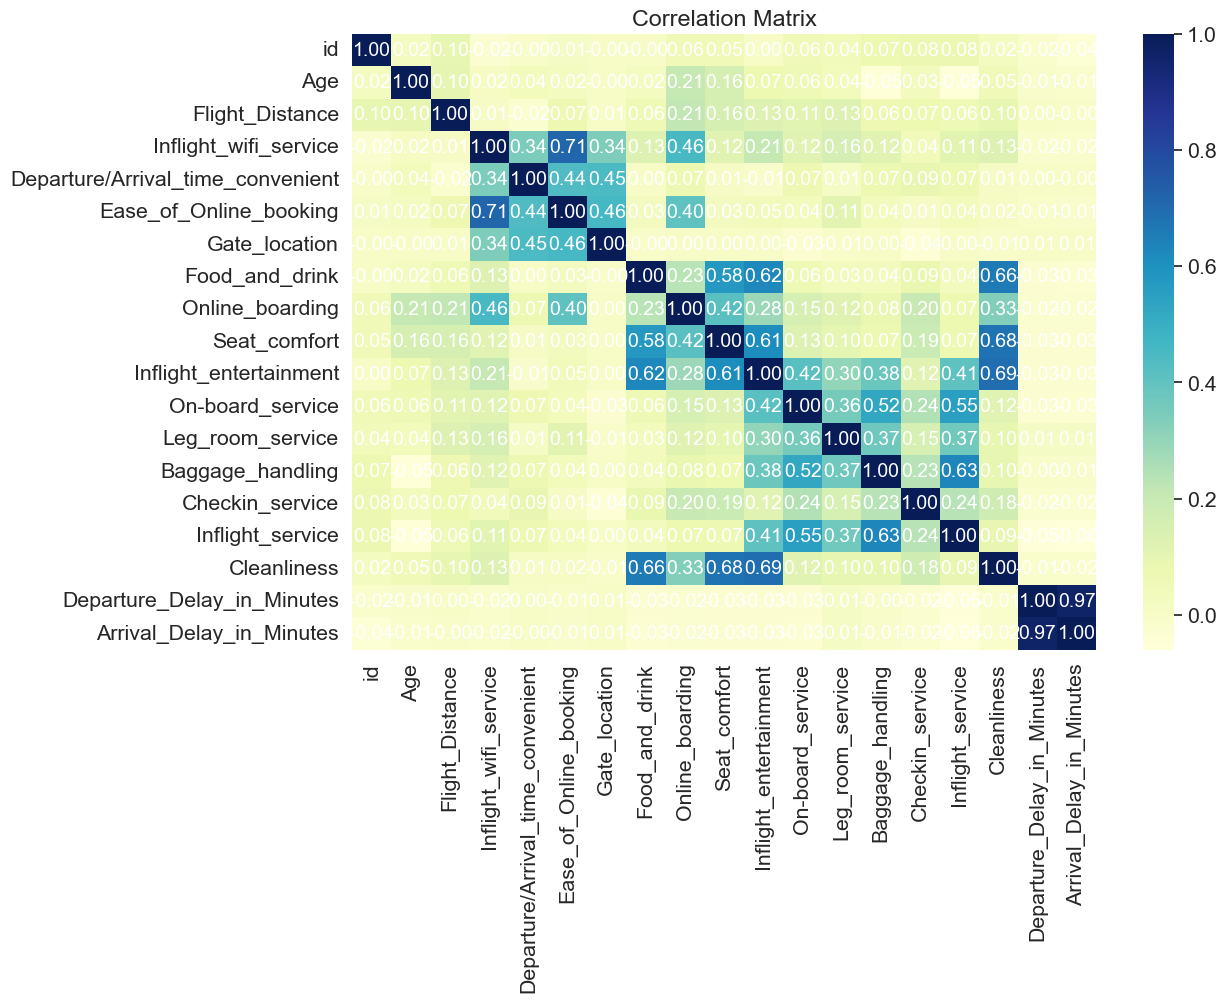

In [29]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.set_style("white")
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', annot_kws={"size": 14, "color": 'white'})
plt.title('Correlation Matrix')
plt.show()

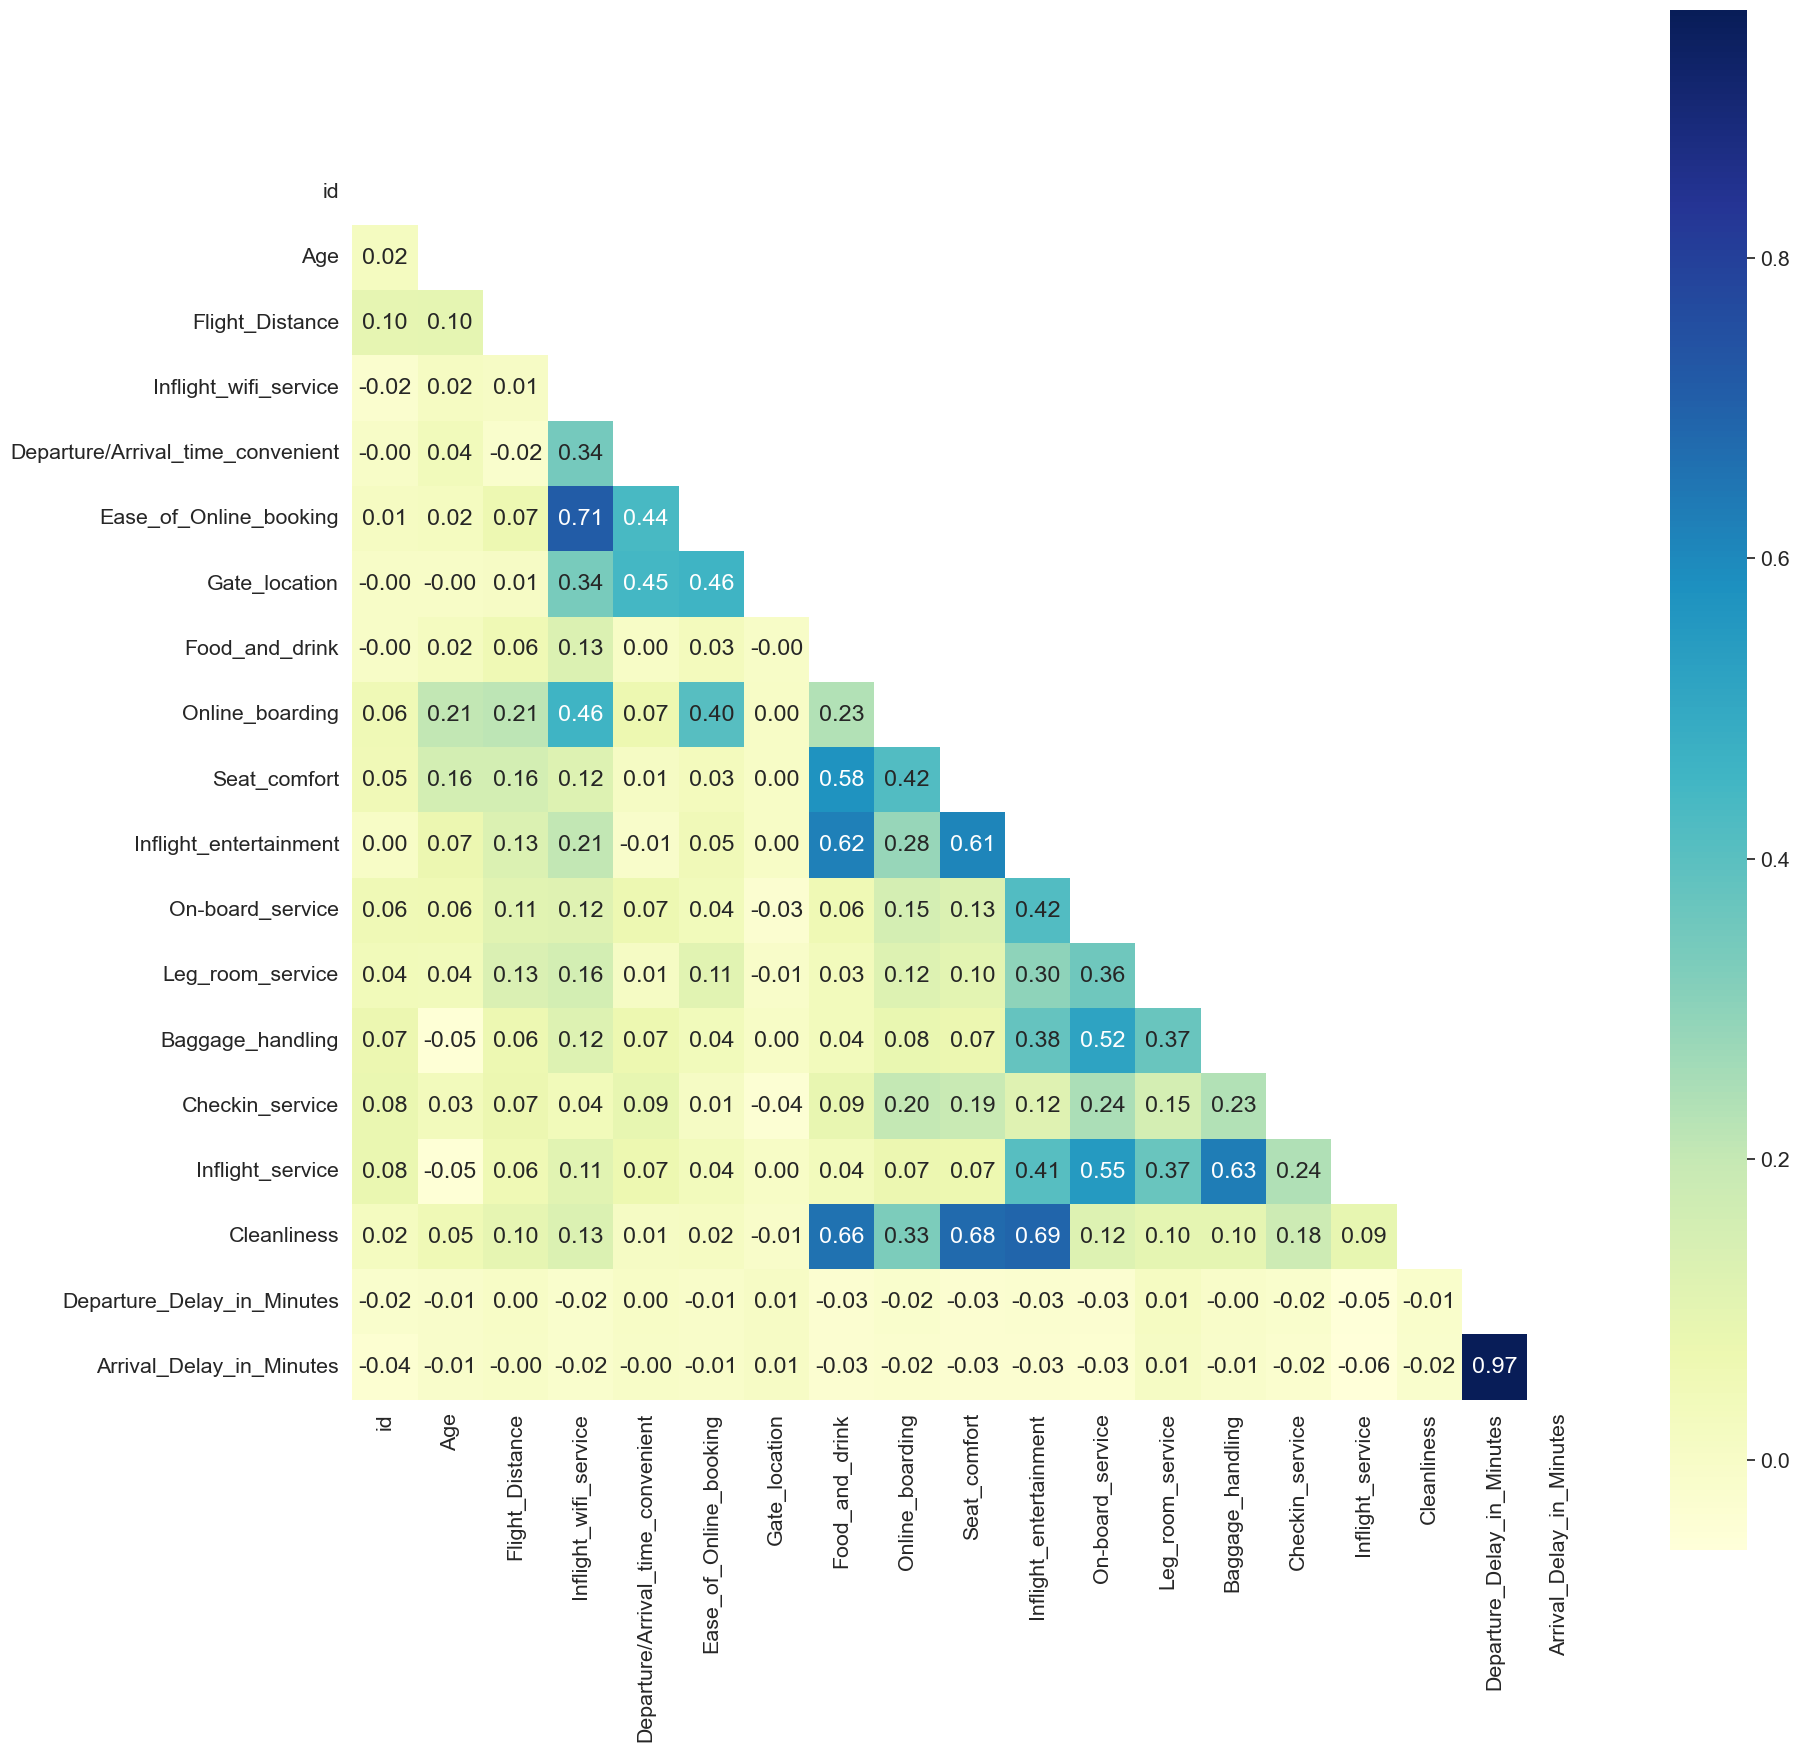

In [30]:
# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap with masked upper triangle
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt=".2f", mask=mask, square=True)
plt.show()

Inflight_wifi_service is very correlated with Ease_of_Online_booking. The ratings for Cleanliness are also correlated to the ratings of Food_and_drink, Seat_Comfort, and Inflight_entertainment. But the two features that are highly correlated are the Departure_Delay_in_Minutes and the Arrival_Delay_in_Minutes, which is very obvious, logically speaking.

### Let's filter down to 4 numerical features instead....

In [9]:
cols = ['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']
filtered_numerical_data = Full_Set[cols]
filtered_numerical_data

Age  Flight_Distance  Departure_Delay_in_Minutes  \
0        13              460                          25   
1        25              235                           1   
2        26             1142                           0   
3        25              562                          11   
4        61              214                           0   
...     ...              ...                         ...   
129875   34              526                           0   
129876   23              646                           0   
129877   17              828                           0   
129878   14             1127                           0   
129879   42              264                           0   

        Arrival_Delay_in_Minutes  
0                           18.0  
1                            6.0  
2                            0.0  
3                            9.0  
4                            0.0  
...                          ...  
129875                       0.0  
129876                       0.0  
129877                       0.0  
129878                       0.0  
129879                       0.0  

[129880 rows x 4 columns]

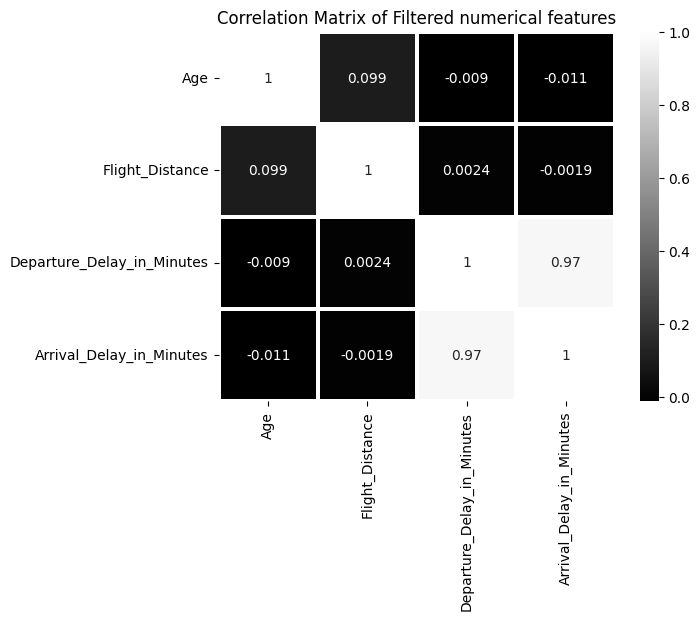

In [10]:
corr_matrix_1 = filtered_numerical_data.corr()

# plot the heatmap
sns.heatmap(corr_matrix_1, annot=True, cmap='gray', linewidths=1.6)
plt.title('Correlation Matrix of Filtered numerical features')
plt.show()

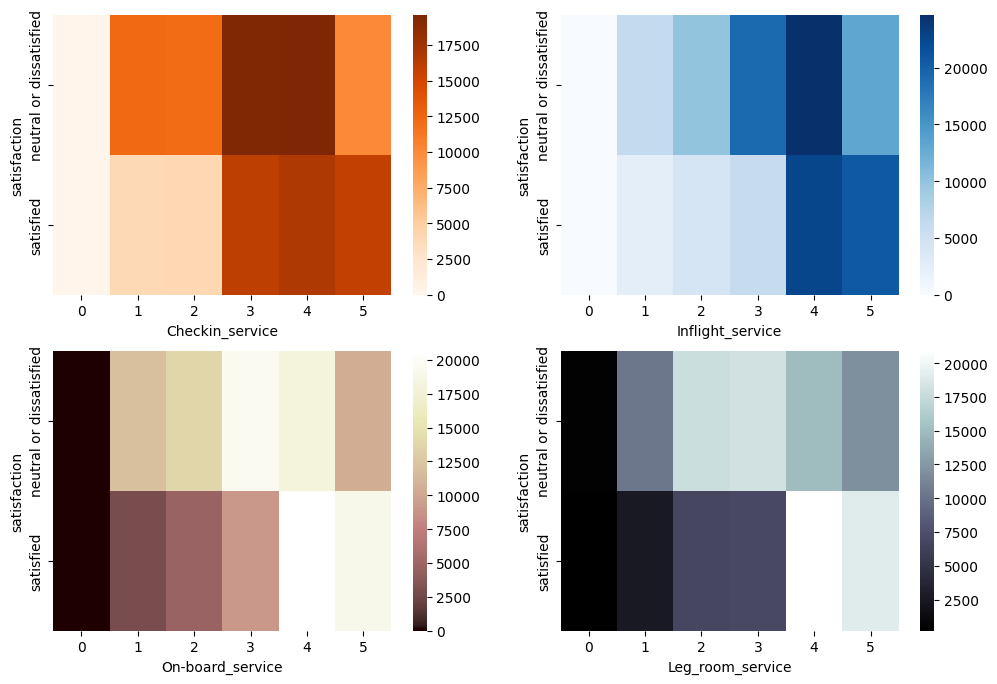

In [16]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(Full_Set['satisfaction'], Full_Set['Checkin_service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(Full_Set['satisfaction'], Full_Set['Inflight_service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(Full_Set['satisfaction'], Full_Set['On-board_service'])
sns.heatmap(table3, cmap='pink', ax = axarr[1][0])
table4 = pd.crosstab(Full_Set['satisfaction'], Full_Set['Leg_room_service'])
sns.heatmap(table4, cmap='bone', ax = axarr[1][1])
plt.show()

*Checkin Service, Inflight Service, On-board Service, Leg-room Service*:  
For checkin service, 0-2 rating givers are predominantly dissatisfied. For other three services, only 4 and 5 rating givers belong to satisfied passengers category.

## Pairplot 

In [31]:
def pairplot(data):
    sns.pairplot(data, hue = 'satisfaction', palette="flare")
    plt.show()
    
pairplot(Full_Set)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001805686CC10> (for post_execute):


KeyboardInterrupt: 

# Taking too long...........need more optimization

## Explaination: 

As we can see that the points lined up more or less along a straight line going from the lower left corner to the upper right. Thus, in some approximation the dependence of the arrival time delay on the departure time delay is linear.

The results obtained are quite logical and can be explained as follows. If the flight of the airline's customers was delayed by a certain amount of time at departure, then the flight will be delayed by about the same amount of time at landing (provided that the aircraft does not accelerate in flight to make up for lost time).

## Boxplot

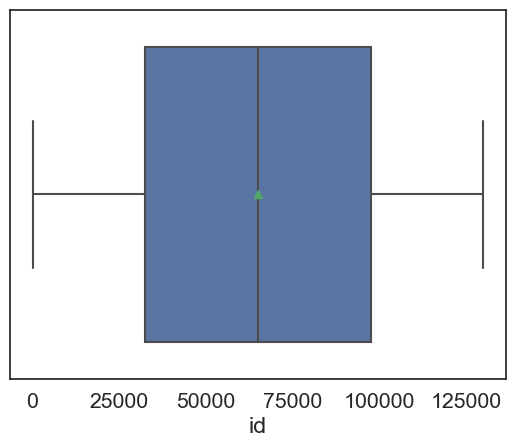

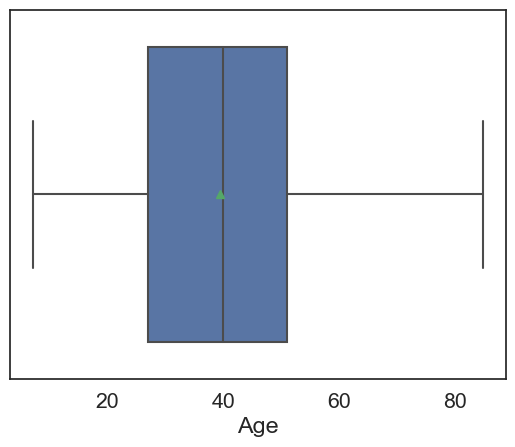

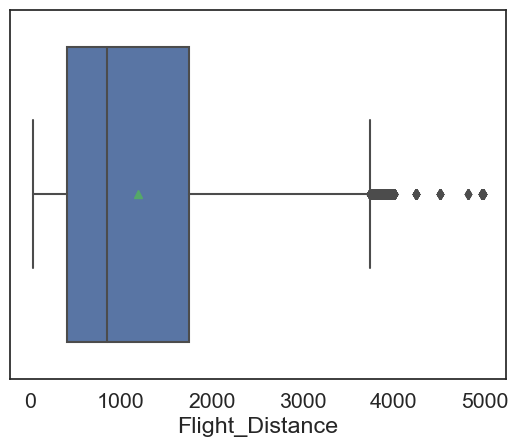

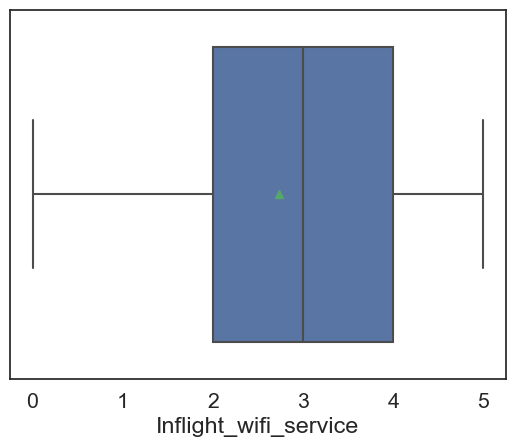

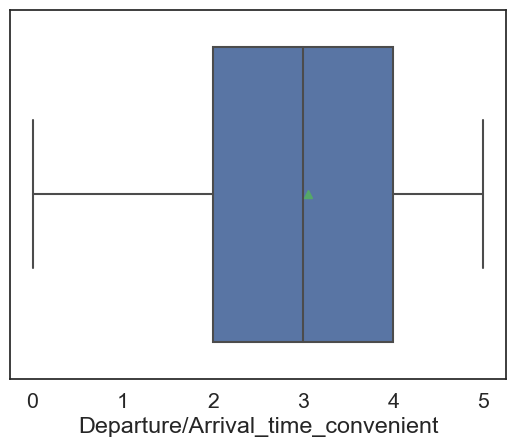

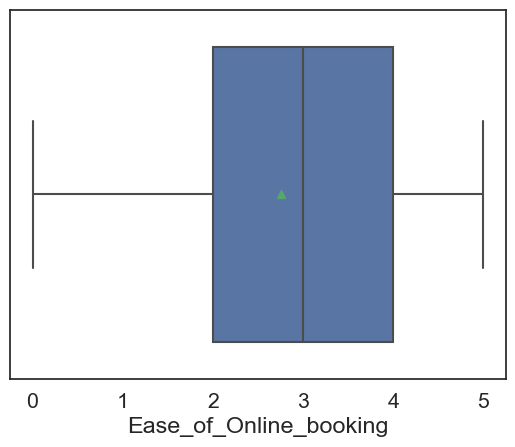

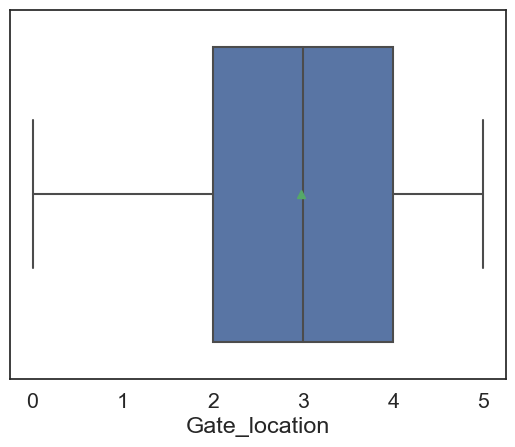

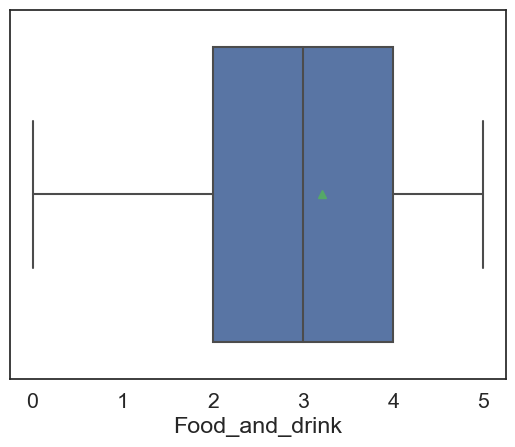

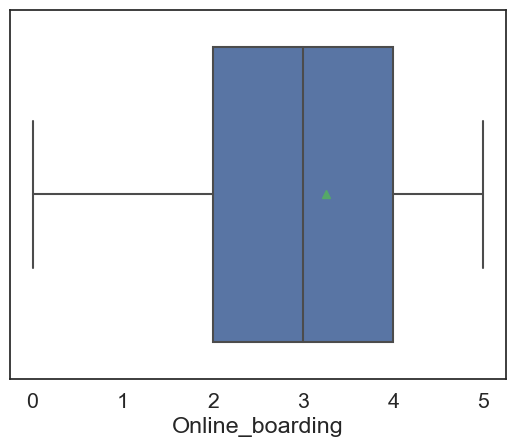

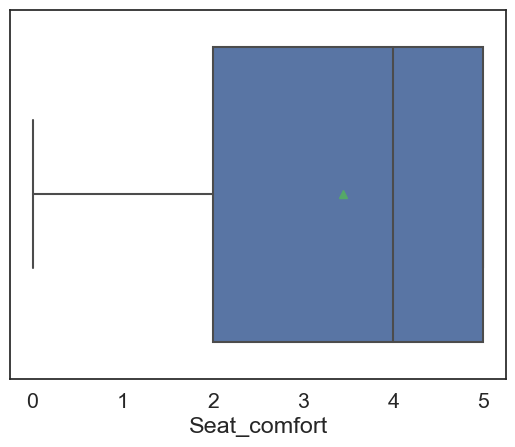

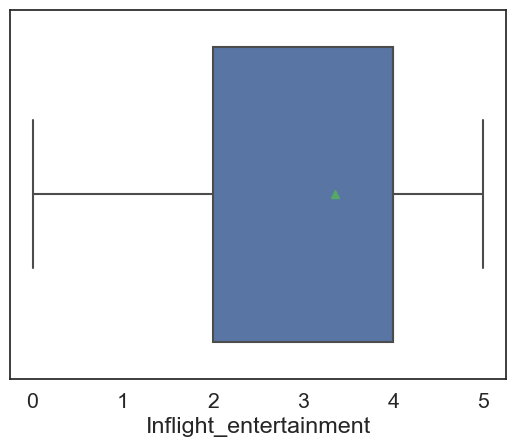

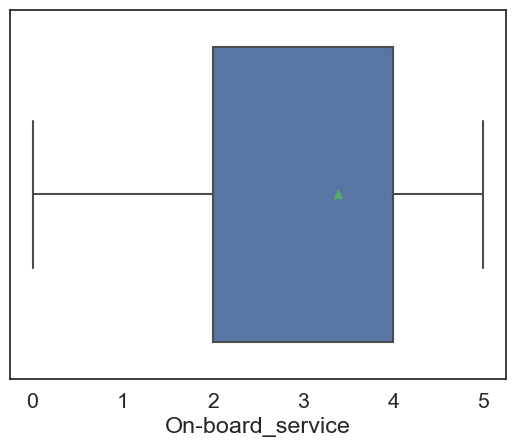

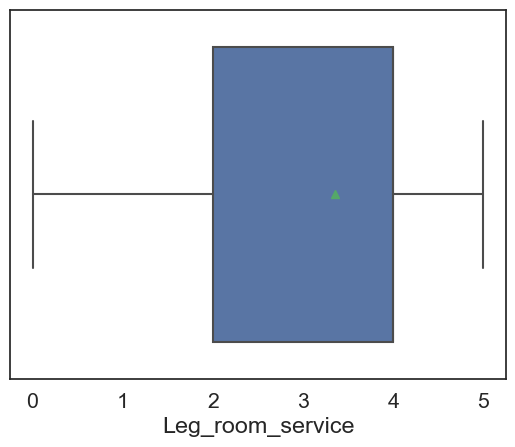

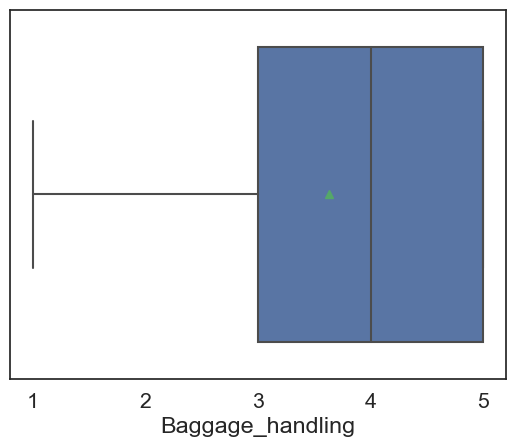

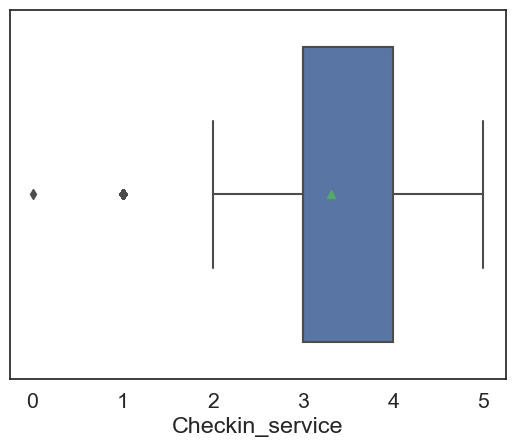

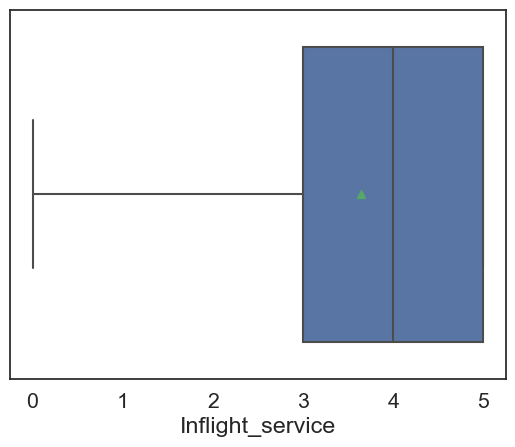

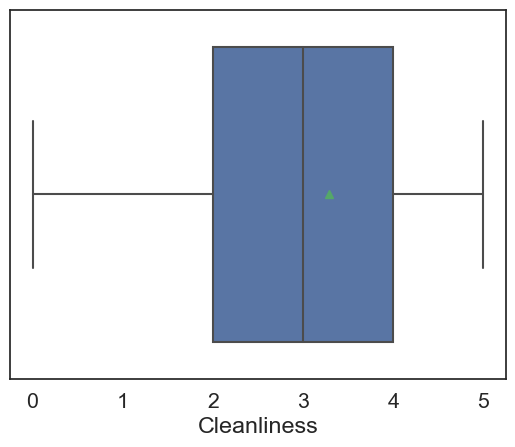

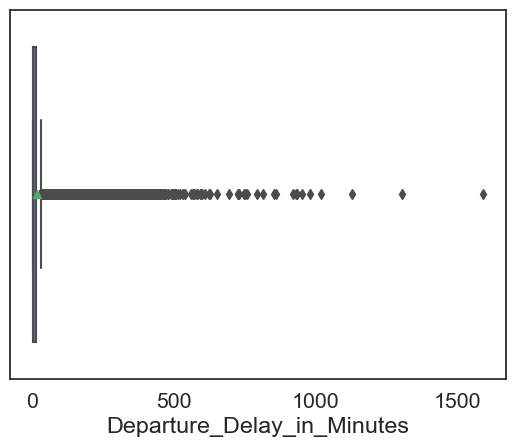

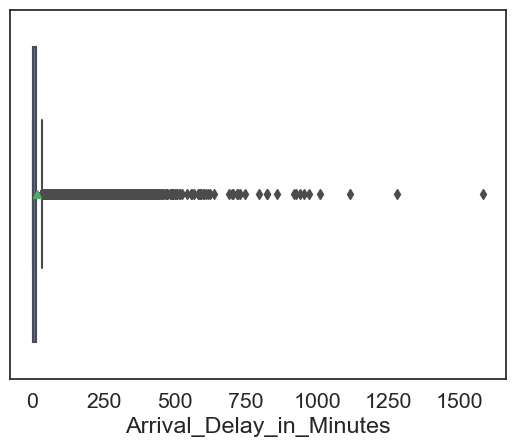

In [32]:
def plot_boxplot(data, feature):
        sns.boxplot(x = data[feature], showmeans = True, data = data)
        plt.show()

numerical_features = Full_Set.select_dtypes(include=['int64', 'float64'])

#features = ['Flight_Distance', 'Departure_Delay_in_Minutes'  , 'Arrival_Delay_in_Minutes'] # numerical features
for feature in numerical_features:
    plot_boxplot(Full_Set, feature)

## Explaination: 

As we can see from those boxplots above, there are many outliers occured in some of our numerical features 

# Pie Chart

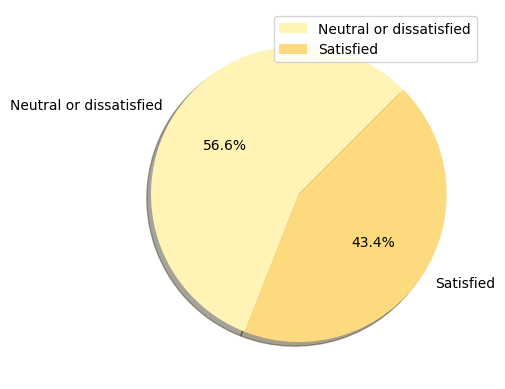

In [5]:
plt.pie(Full_Set.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], \
        colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%', shadow = True,  startangle = 45)
plt.legend(loc = 'best')
plt.show()

### Explaination:
As we can see from the pie chart above, it shows that the target variable of our data is **more or less balanced.**

# The Ratio of categorical feature(univariate analysis) or Ordinal Analysis

In [20]:
Full_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer_Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type_of_Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight_Distance                    129880 non-null  int64  
 7   Inflight_wifi_service              129880 non-null  int64  
 8   Departure/Arrival_time_convenient  129880 non-null  int64  
 9   Ease_of_Online_booking             129880 non-null  int64  
 10  Gate_location                      129880 non-null  int64  
 11  Food_and_drink                     1298

In [23]:
def generate_pie_charts(dataframe):
    columns = dataframe.columns

    exclude_columns = ['id','Unnamed:_0','Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

    for column in columns:
        if column not in exclude_columns:
            plt.figure(figsize=(8, 6))
            counts = dataframe[column].value_counts()
            labels = counts.index
            frequencies = counts.values
            colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

            plt.pie(frequencies, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

            plt.axis('equal')
            plt.title(f"{column} - Frequency")
            plt.legend(title="Categories", loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))

            plt.show()



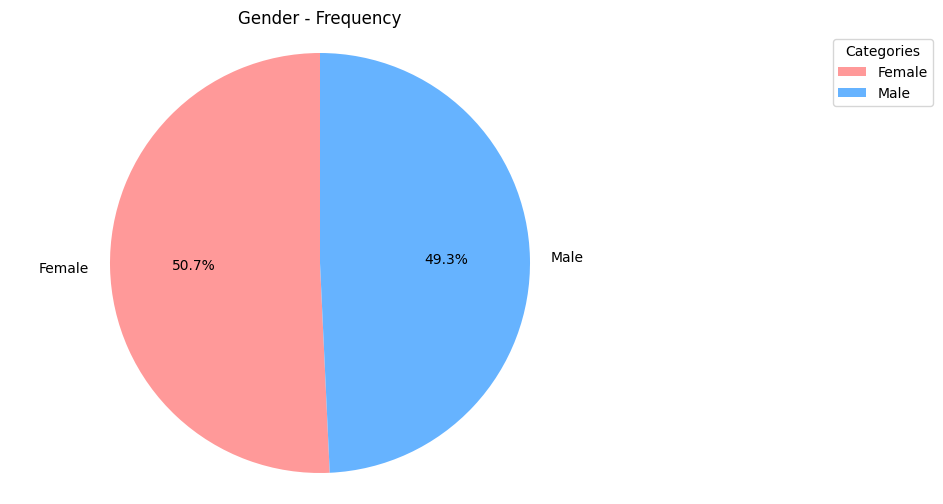

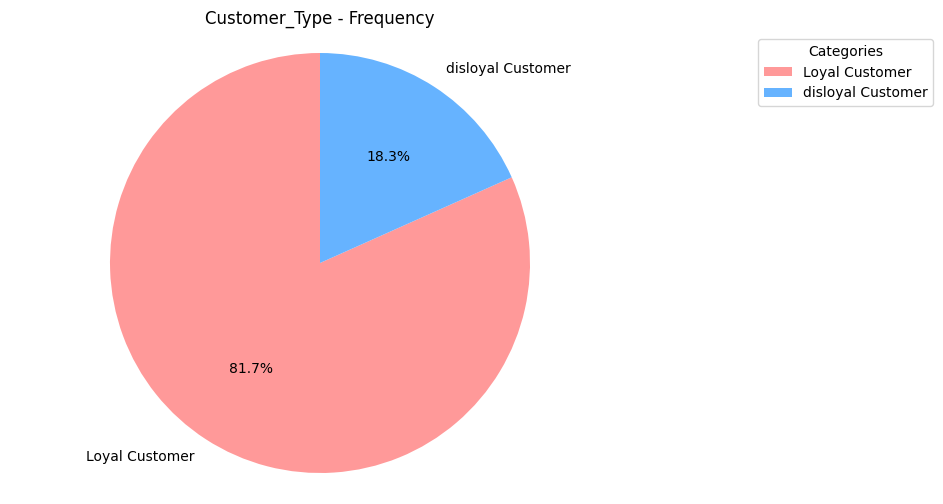

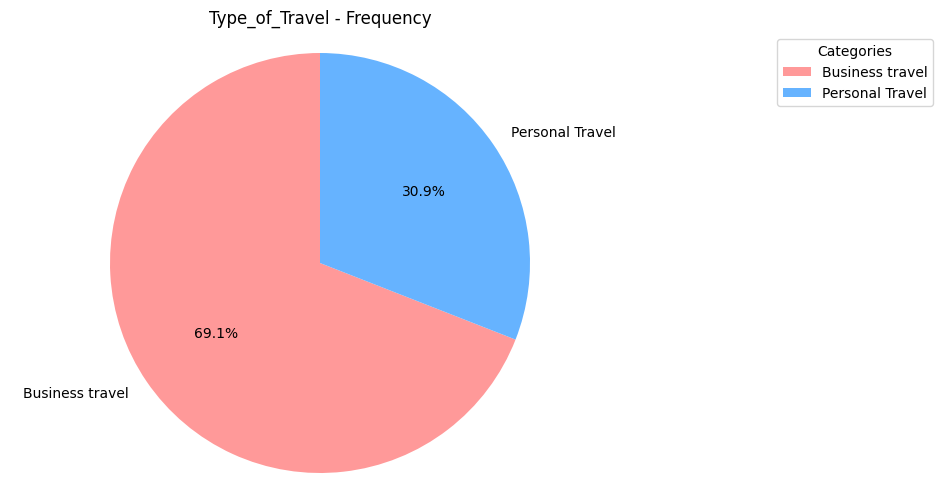

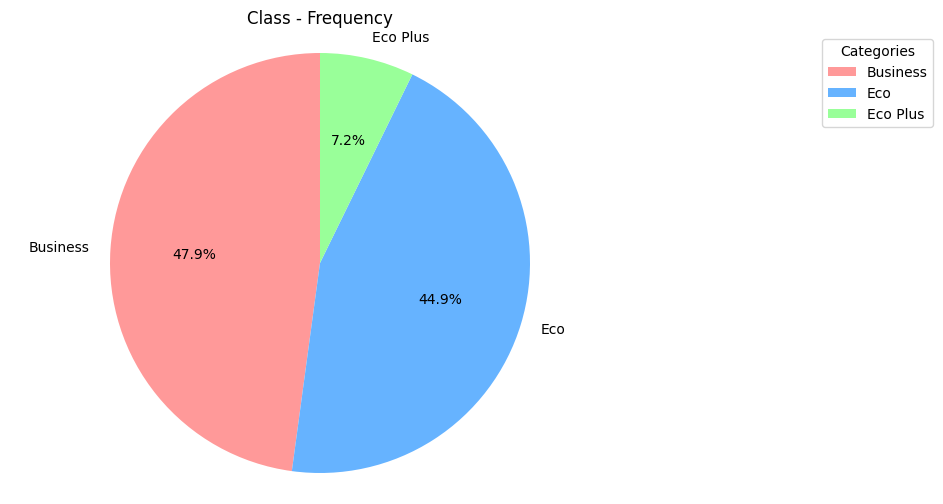

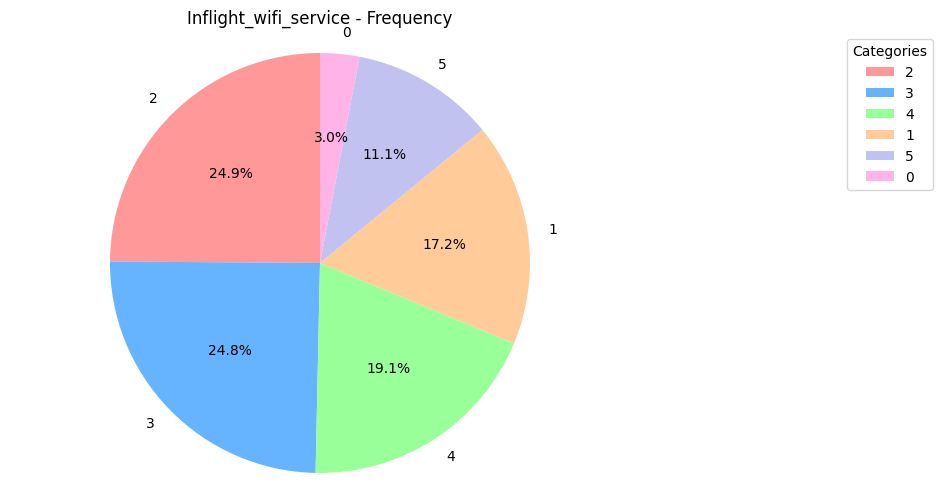

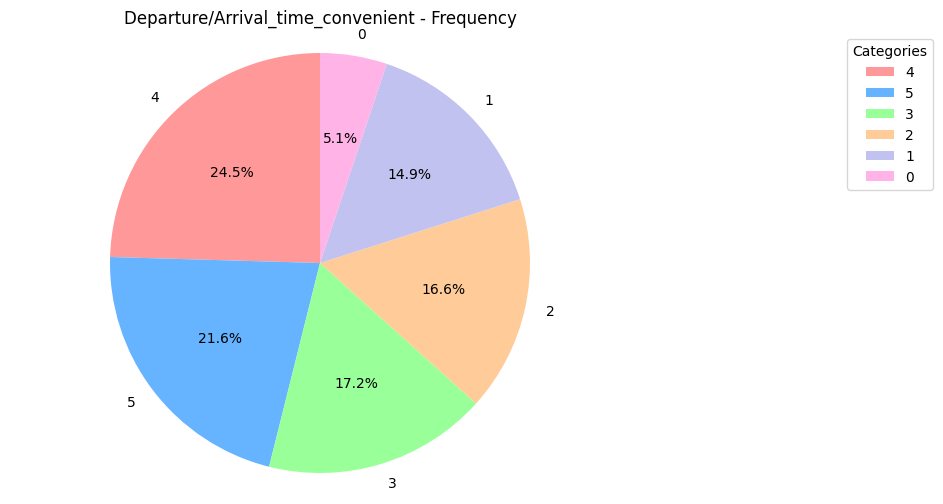

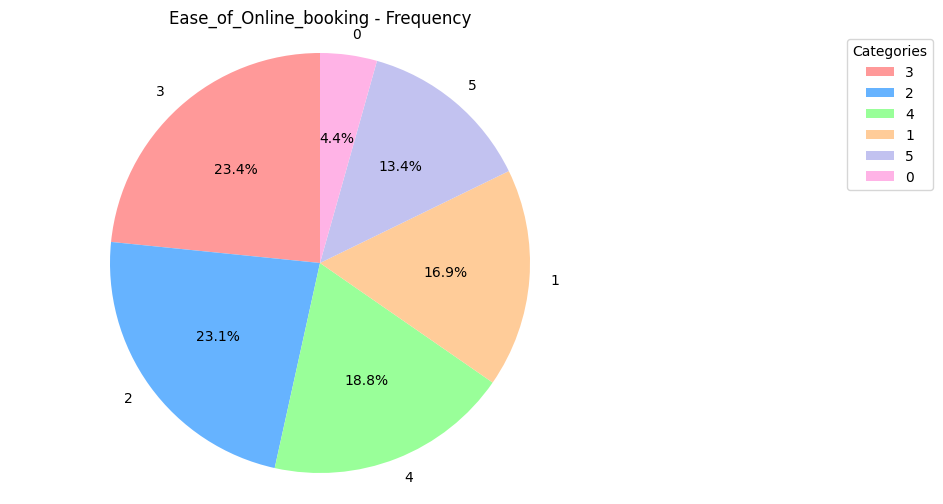

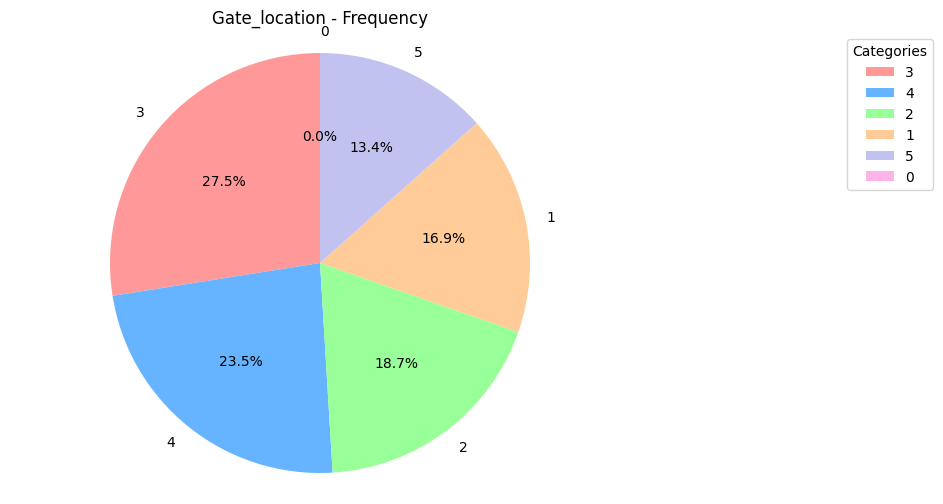

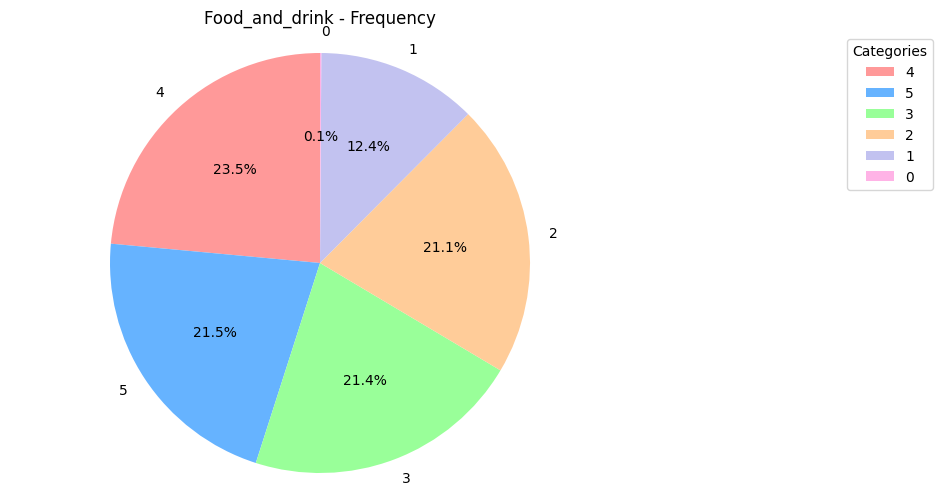

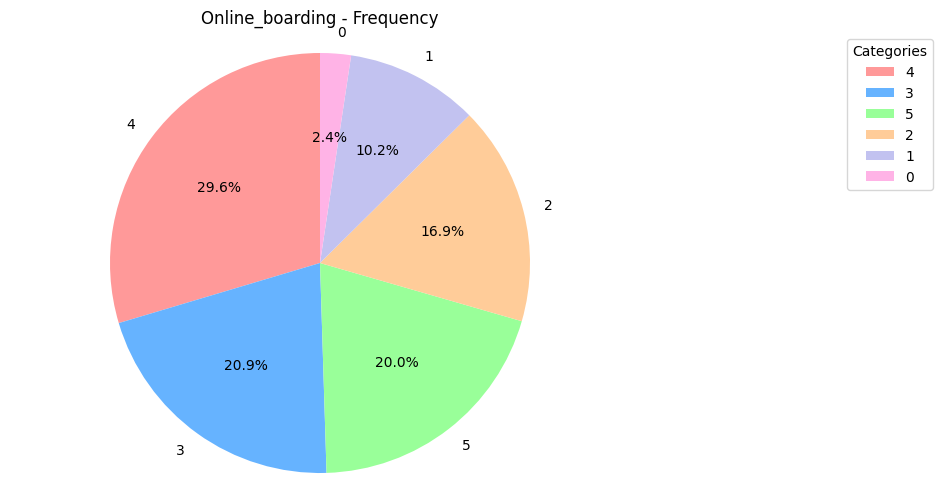

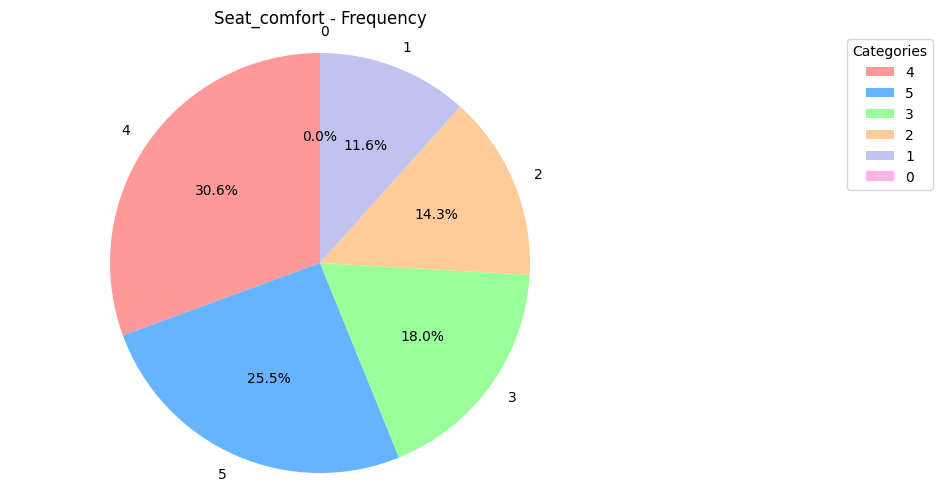

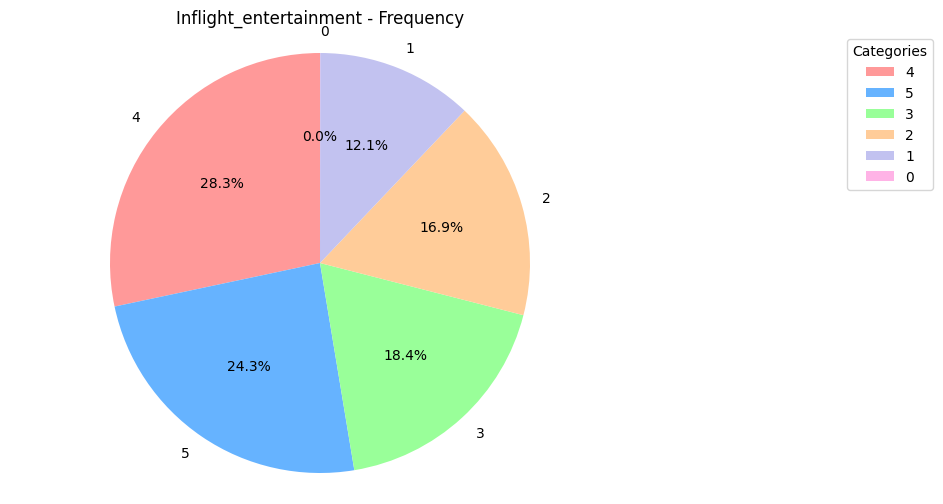

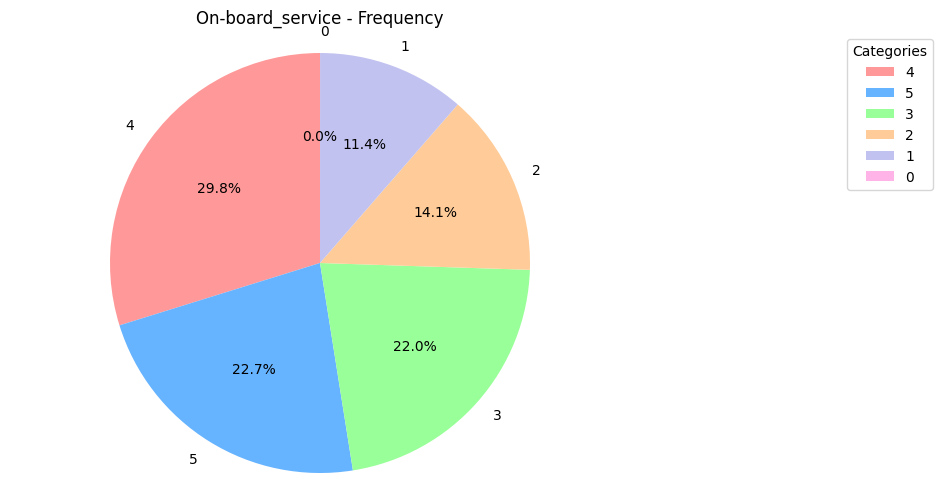

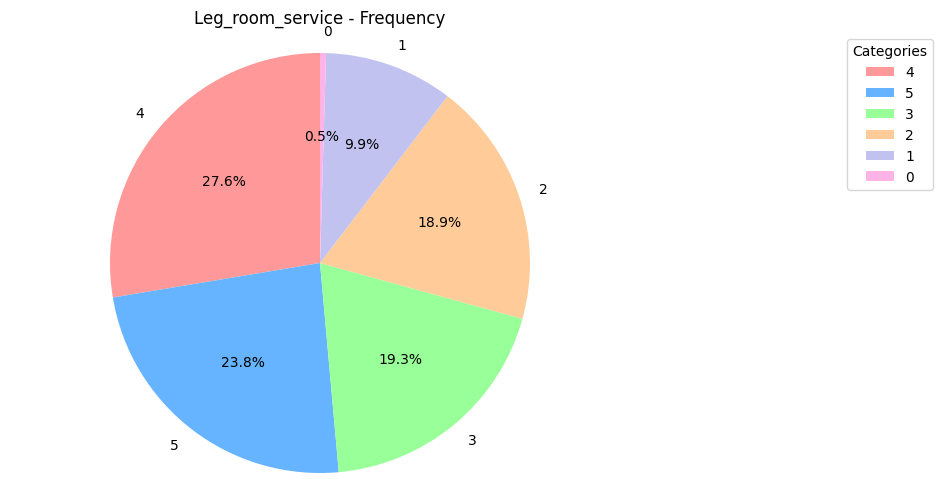

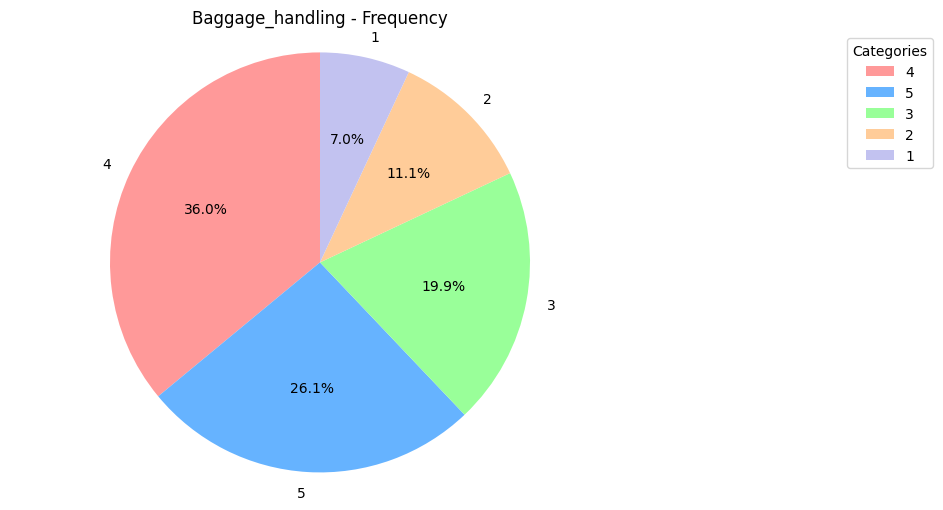

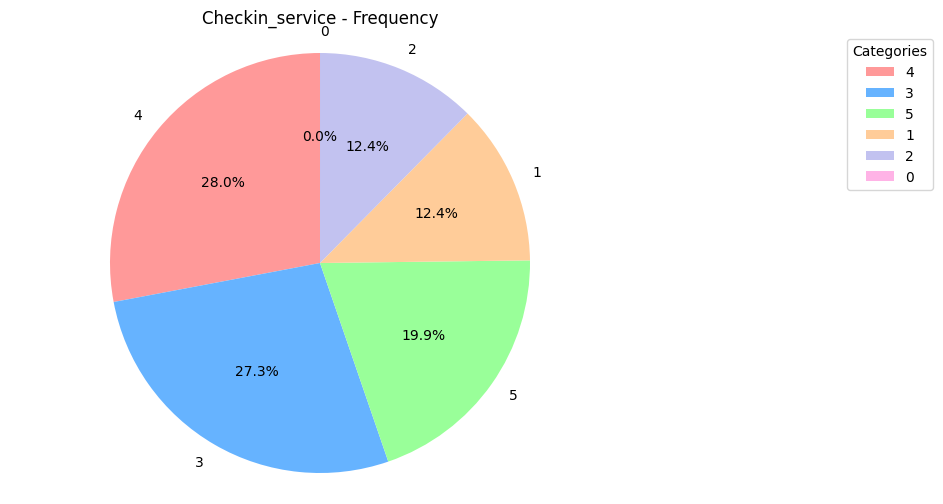

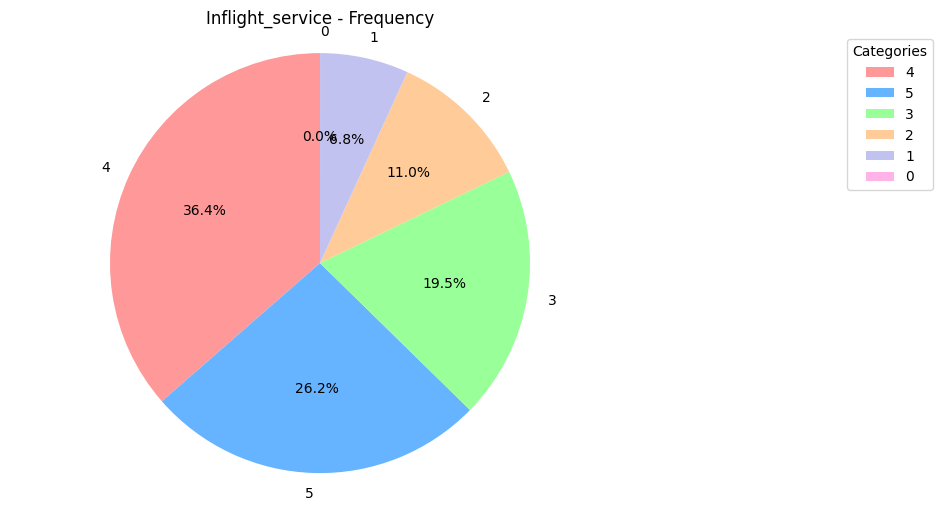

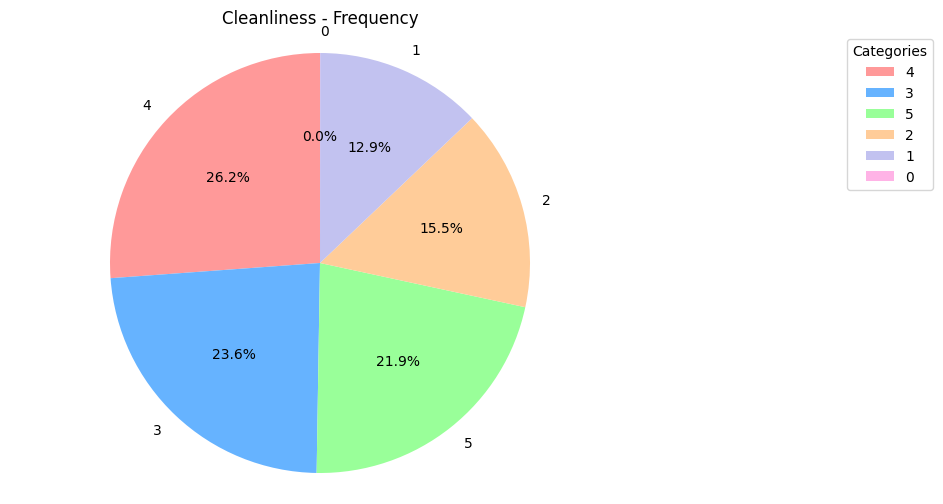

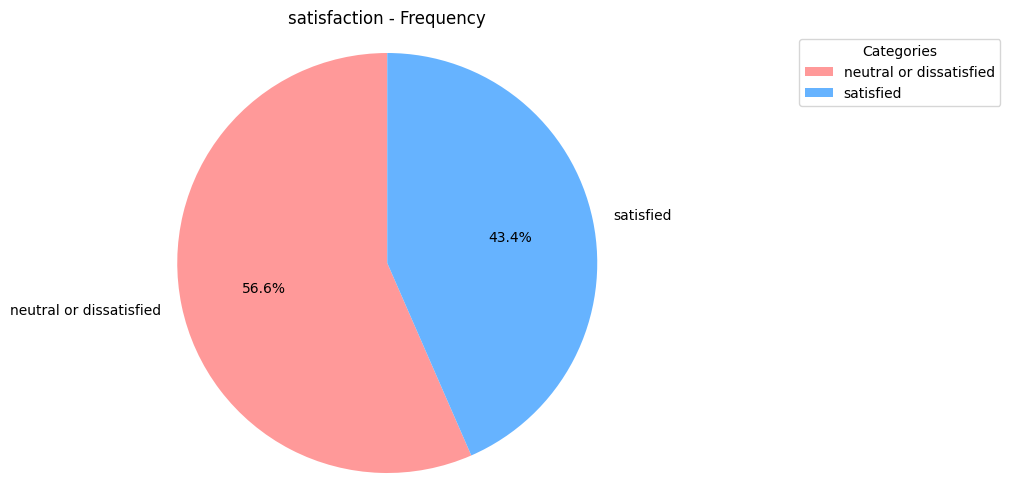

In [24]:
generate_pie_charts(Full_Set)

In [ ]:
Full_Set.columns

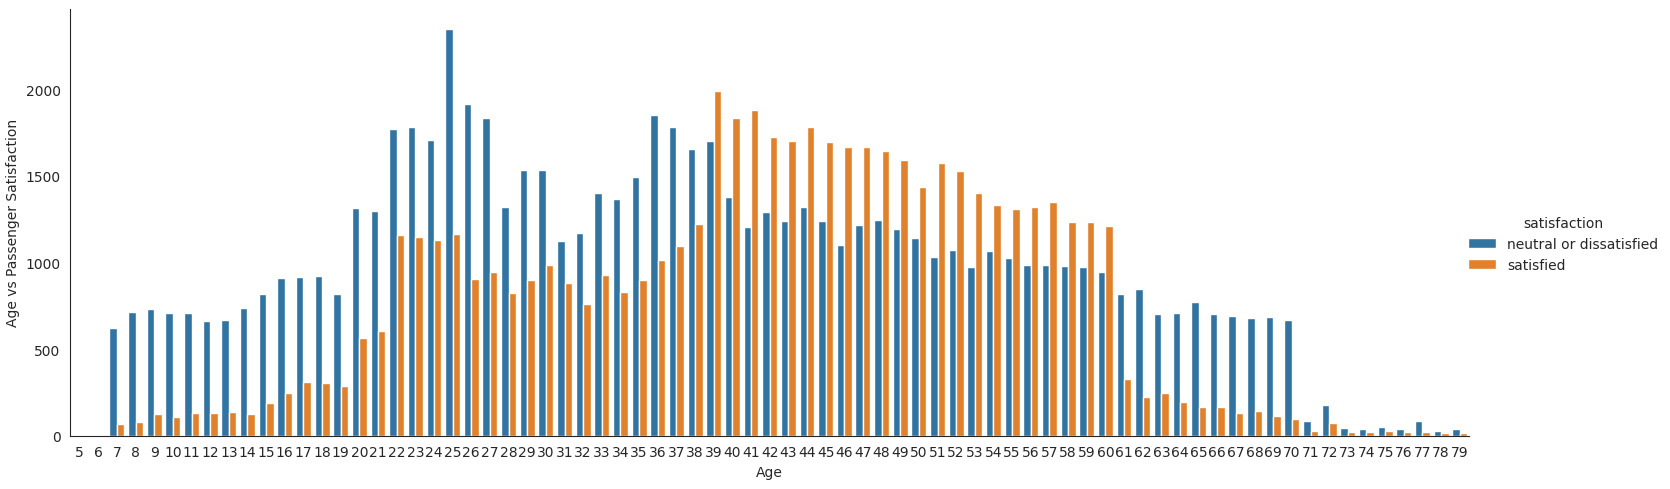

In [25]:
with sns.axes_style('white'):
    g = sns.catplot(x="Age", data=Full_Set, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')


*Age:* From age 7-to-38 and from age 61-to-79, quotient of dissatisfied passengers is very high compared to satisfied passengers. On the contrary, in age range 39-60, quotient of satisfied passengers is higher compared to dissatisfied passengers.

# Bar Graph

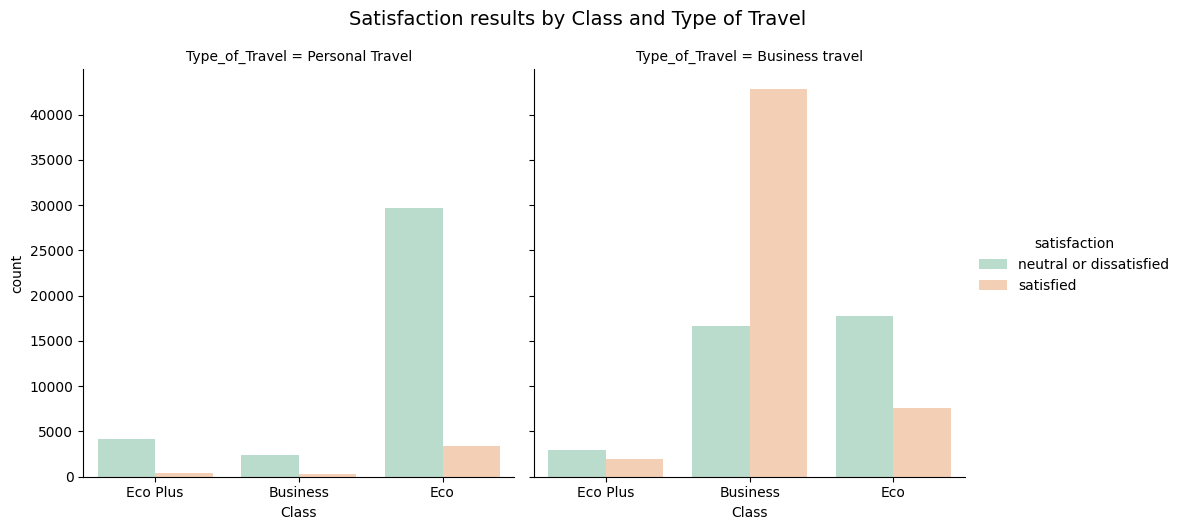

In [6]:
sns.catplot(x='Class', hue ="satisfaction", kind = "count", col = "Type_of_Travel", 
            data = Full_Set ,palette ="Pastel2", height = 5)
plt.suptitle("Satisfaction results by Class and Type of Travel", y = 1.05, fontsize= 14)
plt.show()

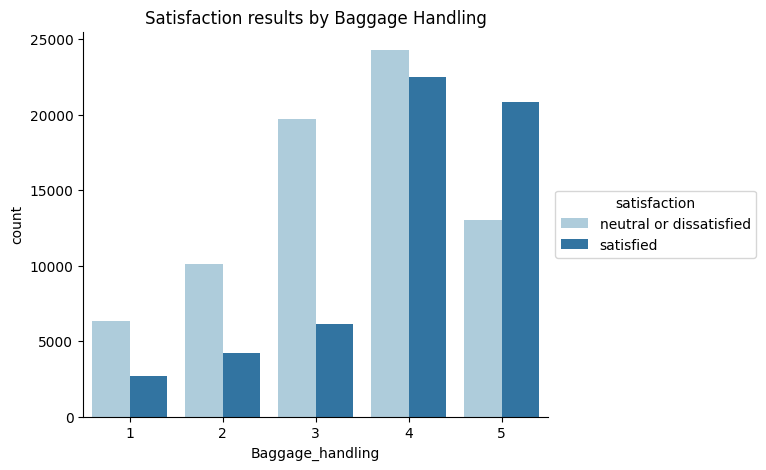

In [9]:
plt.figure(figsize = (6,5))
sns.countplot(x ="Baggage_handling", data = Full_Set, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Baggage Handling")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

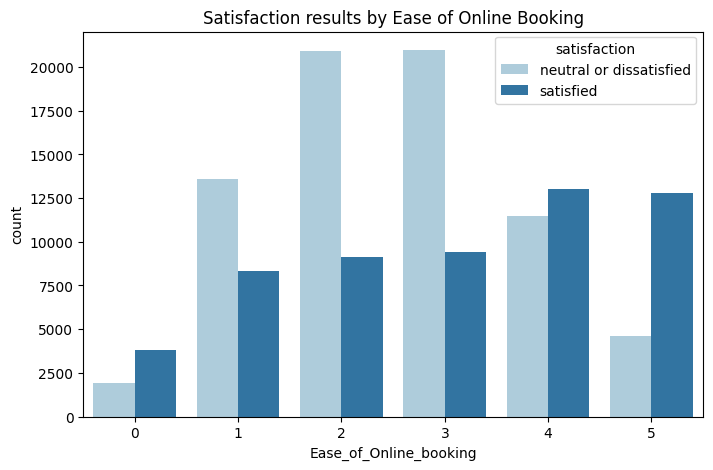

In [10]:
plt.figure(figsize = (8,5))
sns.countplot(x ="Ease_of_Online_booking", data = Full_Set, hue ="satisfaction",palette ="Paired" )

plt.title("Satisfaction results by Ease of Online Booking")
plt.legend(loc = 'center right', bbox_to_anchor=(1, 0.9),  title = "satisfaction")

plt.show()

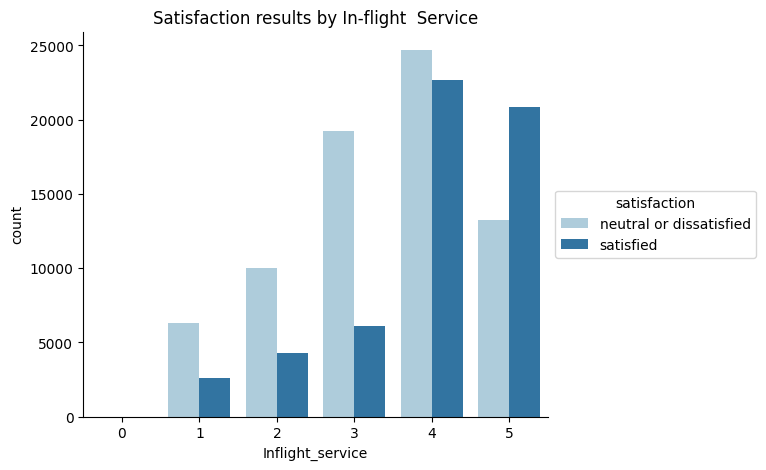

In [12]:
plt.figure(figsize = (6,5))
sns.countplot(x ="Inflight_service", data = Full_Set, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by In-flight  Service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction") 

plt.show()

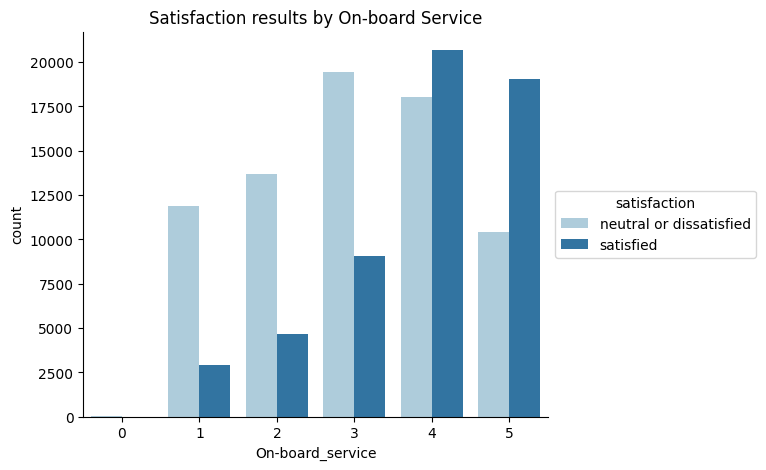

In [14]:
plt.figure(figsize = (6,5))
sns.countplot(x ="On-board_service", data = Full_Set, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by On-board Service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction") 

plt.show()

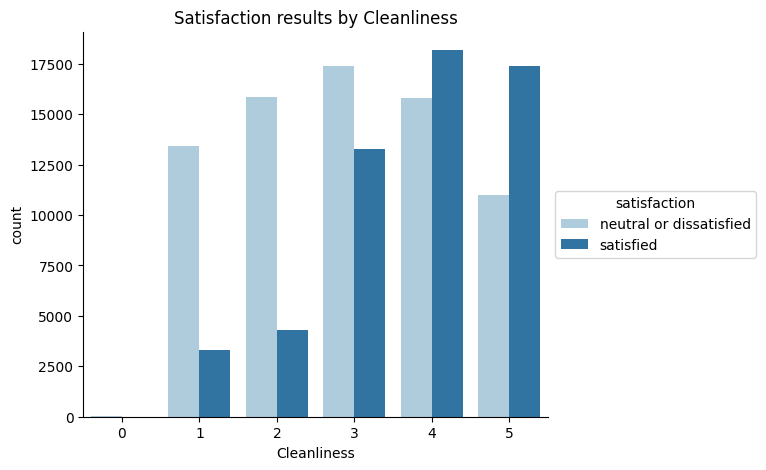

In [15]:
plt.figure(figsize = (6,5))
sns.countplot(x ="Cleanliness", data = Full_Set, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Cleanliness")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "satisfaction") 

plt.show()

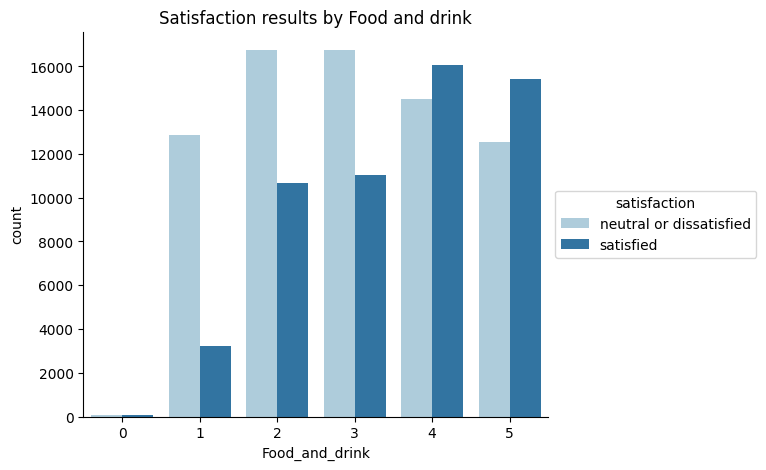

In [16]:
plt.figure(figsize = (6,5))
sns.countplot(x ="Food_and_drink", data = Full_Set, hue ="satisfaction", palette ="Paired" )
plt.title("Satisfaction results by Food and drink")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "satisfaction") 

plt.show()

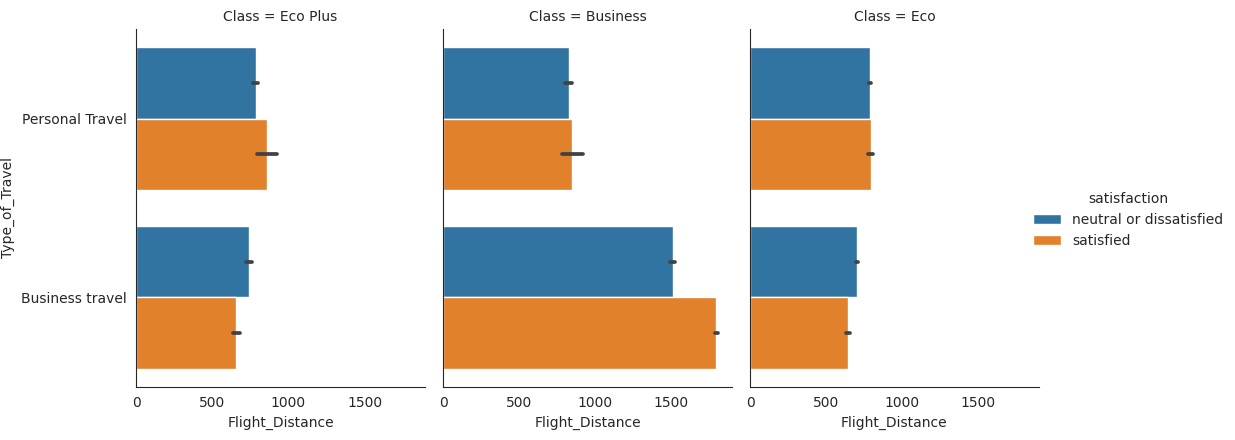

In [19]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=Full_Set, kind="bar", height=4.5, aspect=.8)

*Type of Travel, Class, Flight Distance*: For business travel in business class category, the number of satisfied passengers are quite on the higher side for longer flight distance. For other combinations, there is almost equal distribution of satisfied and dissatisfied passengers.

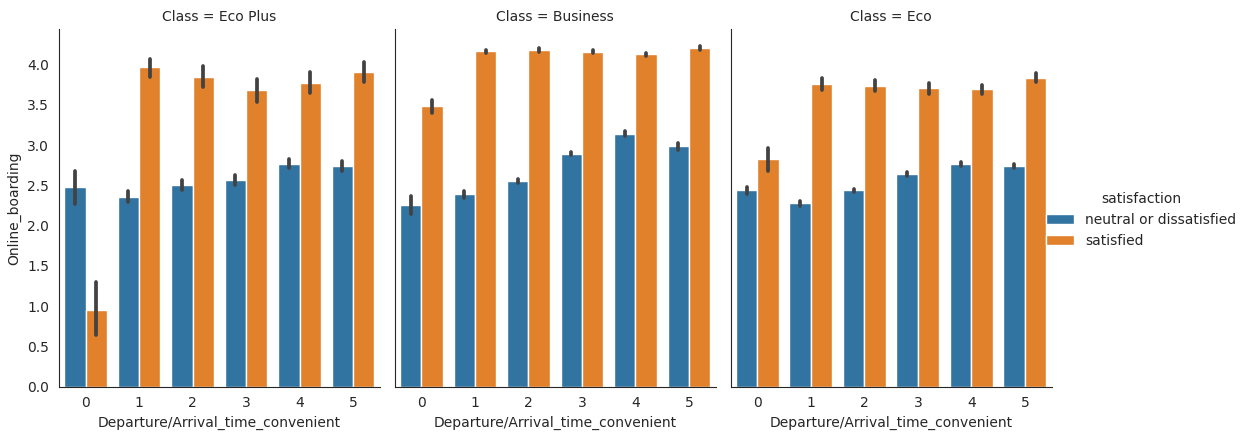

In [20]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=Full_Set, kind="bar", height=4.5, aspect=.8)

*Online Boarding, Departure/Arrival Time Convenience grouped by Class:* For Eco Plus class, very inconvenient Departure/Arrival time (Departure/Arrival_time_convenient = 0) has really high no. of dissatisfied passengers, even when online boarding is done very well. For other combinations, no. of satisfied passengers are on the higher side compared to no. of dissatisfied passengers.

# Checking for percentages of missing values inside each feature

In [34]:
data_with_nan = [features for features in Full_Set.columns if Full_Set[features].isnull().sum]
for feature in data_with_nan:
    print(feature, np.round(Full_Set[feature].isnull().mean(), 4), '% missing values')

id 0.0 % missing values
Gender 0.0 % missing values
Customer_Type 0.0 % missing values
Age 0.0 % missing values
Type_of_Travel 0.0 % missing values
Class 0.0 % missing values
Flight_Distance 0.0 % missing values
Inflight_wifi_service 0.0 % missing values
Departure/Arrival_time_convenient 0.0 % missing values
Ease_of_Online_booking 0.0 % missing values
Gate_location 0.0 % missing values
Food_and_drink 0.0 % missing values
Online_boarding 0.0 % missing values
Seat_comfort 0.0 % missing values
Inflight_entertainment 0.0 % missing values
On-board_service 0.0 % missing values
Leg_room_service 0.0 % missing values
Baggage_handling 0.0 % missing values
Checkin_service 0.0 % missing values
Inflight_service 0.0 % missing values
Cleanliness 0.0 % missing values
Departure_Delay_in_Minutes 0.0 % missing values
Arrival_Delay_in_Minutes 0.003 % missing values
satisfaction 0.0 % missing values


# Fill missing value with mean value

In [35]:
data = Full_Set.fillna({'Arrival_Delay_in_Minutes' : np.min(Full_Set['Arrival_Delay_in_Minutes'])})
for feature in data_with_nan:
    print(feature, np.round(data[feature].isnull().mean(), 4), '% missing values')

id 0.0 % missing values
Gender 0.0 % missing values
Customer_Type 0.0 % missing values
Age 0.0 % missing values
Type_of_Travel 0.0 % missing values
Class 0.0 % missing values
Flight_Distance 0.0 % missing values
Inflight_wifi_service 0.0 % missing values
Departure/Arrival_time_convenient 0.0 % missing values
Ease_of_Online_booking 0.0 % missing values
Gate_location 0.0 % missing values
Food_and_drink 0.0 % missing values
Online_boarding 0.0 % missing values
Seat_comfort 0.0 % missing values
Inflight_entertainment 0.0 % missing values
On-board_service 0.0 % missing values
Leg_room_service 0.0 % missing values
Baggage_handling 0.0 % missing values
Checkin_service 0.0 % missing values
Inflight_service 0.0 % missing values
Cleanliness 0.0 % missing values
Departure_Delay_in_Minutes 0.0 % missing values
Arrival_Delay_in_Minutes 0.0 % missing values
satisfaction 0.0 % missing values


# Checking for outliers

In [36]:
def detect_outlier(data_set):
    outlier_lst = []
    q1 = data_set.quantile(0.25)
    q3 = data_set.quantile(0.75)
    
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    upper_outliers_index = data_set[data_set > upper_bound].index.tolist()
    lower_outliers_index = data_set[data_set < lower_bound].index.tolist()
    
#     upper_outliers = data_set[data_set > upper_bound].tolist()
#     lower_outliers = data_set[data_set < lower_bound]
    
    print(f'Outliers Index: ', upper_outliers_index)

print(detect_outlier(data['Flight_Distance']))

Outliers Index:  [80, 173, 201, 215, 379, 388, 421, 446, 458, 473, 483, 569, 634, 717, 778, 794, 799, 869, 879, 939, 978, 994, 1061, 1068, 1092, 1101, 1114, 1120, 1186, 1236, 1248, 1252, 1269, 1417, 1425, 1496, 1541, 1548, 1587, 1705, 1752, 1846, 1847, 1876, 1932, 1948, 2156, 2194, 2208, 2213, 2286, 2297, 2363, 2392, 2401, 2495, 2544, 2556, 2619, 2628, 2659, 2736, 2803, 2818, 2847, 2970, 2981, 3027, 3030, 3046, 3090, 3129, 3186, 3282, 3379, 3401, 3405, 3407, 3485, 3486, 3516, 3525, 3660, 3773, 3838, 3866, 3912, 3927, 4003, 4013, 4031, 4071, 4073, 4114, 4134, 4362, 4363, 4539, 4545, 4593, 4676, 4725, 4762, 4794, 4832, 4849, 4930, 4935, 4939, 4941, 5170, 5216, 5276, 5342, 5370, 5381, 5383, 5409, 5466, 5504, 5554, 5583, 5639, 5650, 5703, 5732, 5733, 5743, 5750, 5758, 5779, 5781, 5866, 5903, 5985, 6058, 6135, 6159, 6259, 6328, 6348, 6489, 6506, 6535, 6617, 6753, 6776, 6778, 6812, 6846, 6882, 6959, 6967, 7104, 7106, 7120, 7138, 7150, 7206, 7306, 7326, 7346, 7351, 7355, 7393, 7496, 7648, 768

In [8]:
data.head()

Unnamed:_0      id  Gender      Customer_Type  Age   Type_of_Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight_Distance  Inflight_wifi_service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival_time_convenient  ...  Inflight_entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight_service  Cleanliness  Departure_Delay_in_Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival_Delay_in_Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [37]:
data.to_csv('eda_done.csv',index=True)

# <u><font color='red'>**Second presentation starts here**

## <u><font color='turquoise'>**Performing Satistical/Logistic regression Analysis**</font></u>

# Identify your model
Here are the general steps for logistic regression analysis:

Split your dataset into a training set and a test set.

Encode your categorical variables using one-hot encoding or label encoding.

Scale your continuous variables using standardization or normalization.

Fit a logistic regression model to your training data using a suitable optimization algorithm, such as gradient descent.

Evaluate the performance of your logistic regression model on the test set using metrics such as accuracy, precision, recall, and F1-score.

Interpret the coefficients of your logistic regression model to understand the relationship between your independent variables and the dependent variable.


# Analyze the assumptions for a linear regression model:

<li>Linearity</li>
<li>Independence</li>
<li>Normality</li>
<li>Homoscedasticity</li>
<li>Multicollinearity</li>

#### Let's try to use the linear model as our first model and we'll see what happens...


<h5>But first, we need to encode the reponse variable(of catergorical type) into a numerical type by the following codes:</h5>
<ol><font color='green'><b>satisfied := 1</n></font></ol>
<ol><font color='green'><b>dissatisfied or neautral := 0</b></font></ol>


**If not you will get the following error when trying to fit a linear model for an obvious reason.**

In [38]:
model = smf.ols(formula='satisfaction ~ Departure_Delay_in_Minutes + Arrival_Delay_in_Minutes', data=data).fit()
print(model.summary())

NameError: name 'smf' is not defined


<h4>But for precaution, we will create a copy of our original data frame called 'data_test_lr' then test the linear regression model on the copy instead called 'data_test_lr'</h4>

In [39]:
data_test_lr = data.copy()

In [40]:
data_test_lr.to_csv('output1.csv', header=True)

In [41]:
data_test_lr

id  Gender      Customer_Type  Age   Type_of_Travel     Class  \
0        70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         5047    Male  disloyal Customer   25  Business travel  Business   
2       110028  Female     Loyal Customer   26  Business travel  Business   
3        24026  Female     Loyal Customer   25  Business travel  Business   
4       119299    Male     Loyal Customer   61  Business travel  Business   
...        ...     ...                ...  ...              ...       ...   
129875   78463    Male  disloyal Customer   34  Business travel  Business   
129876   71167    Male     Loyal Customer   23  Business travel  Business   
129877   37675  Female     Loyal Customer   17  Personal Travel       Eco   
129878   90086    Male     Loyal Customer   14  Business travel  Business   
129879   34799  Female     Loyal Customer   42  Personal Travel       Eco   

        Flight_Distance  Inflight_wifi_service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
129875              526                      3   
129876              646                      4   
129877              828                      2   
129878             1127                      3   
129879              264                      2   

        Departure/Arrival_time_convenient  Ease_of_Online_booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
129875                                  3                       3  ...   
129876                                  4                       4  ...   
129877                                  5                       1  ...   
129878                                  3                       3  ...   
129879                                  5                       2  ...   

        Inflight_entertainment  On-board_service  Leg_room_service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
129875                       4                 3                 2   
129876                       4                 4                 5   
129877                       2                 4                 3   
129878                       4                 3                 2   
129879                       1                 1                 2   

        Baggage_handling  Checkin_service  Inflight_service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
129875                 4                4                 5            4   
129876                 5                5                 5            4   
129877                 4                5                 4            2

**Then we shall convert the 'satisfaction' column to a binary variable (0 or 1)**

In [42]:
data_test_lr['satisfaction'] = data_test_lr['satisfaction'].replace({'neutral or dissatisfied':0, 'satisfied':1})
data_test_lr

id  Gender      Customer_Type  Age   Type_of_Travel     Class  \
0        70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         5047    Male  disloyal Customer   25  Business travel  Business   
2       110028  Female     Loyal Customer   26  Business travel  Business   
3        24026  Female     Loyal Customer   25  Business travel  Business   
4       119299    Male     Loyal Customer   61  Business travel  Business   
...        ...     ...                ...  ...              ...       ...   
129875   78463    Male  disloyal Customer   34  Business travel  Business   
129876   71167    Male     Loyal Customer   23  Business travel  Business   
129877   37675  Female     Loyal Customer   17  Personal Travel       Eco   
129878   90086    Male     Loyal Customer   14  Business travel  Business   
129879   34799  Female     Loyal Customer   42  Personal Travel       Eco   

        Flight_Distance  Inflight_wifi_service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
129875              526                      3   
129876              646                      4   
129877              828                      2   
129878             1127                      3   
129879              264                      2   

        Departure/Arrival_time_convenient  Ease_of_Online_booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
129875                                  3                       3  ...   
129876                                  4                       4  ...   
129877                                  5                       1  ...   
129878                                  3                       3  ...   
129879                                  5                       2  ...   

        Inflight_entertainment  On-board_service  Leg_room_service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
129875                       4                 3                 2   
129876                       4                 4                 5   
129877                       2                 4                 3   
129878                       4                 3                 2   
129879                       1                 1                 2   

        Baggage_handling  Checkin_service  Inflight_service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
129875                 4                4                 5            4   
129876                 5                5                 5            4   
129877                 4                5                 4            2

### Plot 

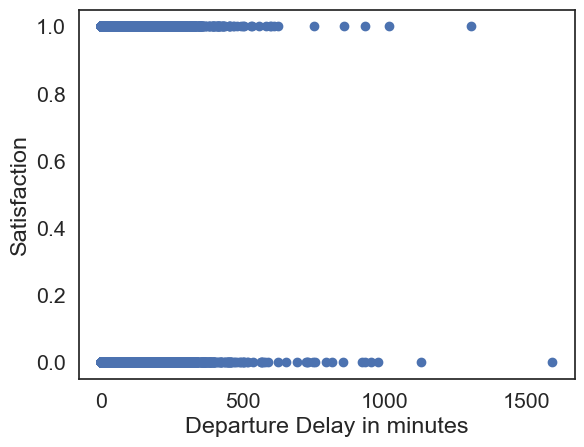

In [43]:
plt.scatter(data_test_lr['Departure_Delay_in_Minutes'], data_test_lr['satisfaction'])
plt.xlabel('Departure Delay in minutes')
plt.ylabel('Satisfaction')
plt.show()


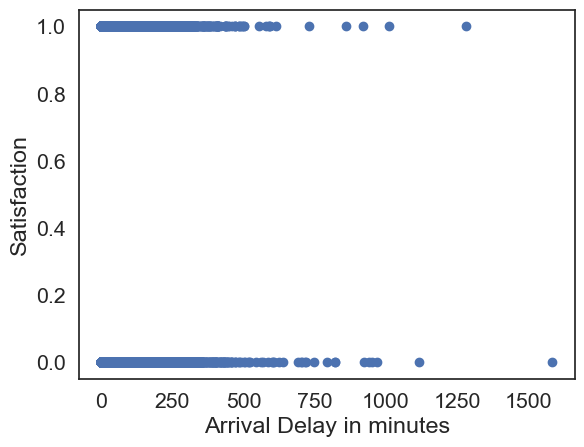

In [44]:
plt.scatter(data_test_lr['Arrival_Delay_in_Minutes'], data_test_lr['satisfaction'])
plt.xlabel('Arrival Delay in minutes')
plt.ylabel('Satisfaction')
plt.show()

In [45]:
import statsmodels.formula.api as smf

In [46]:
# convert the "satisfaction" column to a numeric data type
data_test_lr["satisfaction"] = pd.to_numeric(data_test_lr["satisfaction"], errors="coerce")


# fit the model
model = smf.ols(formula='satisfaction ~ Departure_Delay_in_Minutes + Arrival_Delay_in_Minutes', data=data_test_lr).fit()

# print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     241.2
Date:                Sat, 17 Jun 2023   Prob (F-statistic):          2.79e-105
Time:                        11:39:08   Log-Likelihood:                -92900.
No. Observations:              129880   AIC:                         1.858e+05
Df Residuals:                  129877   BIC:                         1.858e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [47]:
# fit the model
model_1 = smf.ols(formula='satisfaction ~ Arrival_Delay_in_Minutes', data=data_test_lr).fit()

# print the summary
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     440.6
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           1.17e-97
Time:                        11:39:09   Log-Likelihood:                -92920.
No. Observations:              129880   AIC:                         1.858e+05
Df Residuals:                  129878   BIC:                         1.859e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [48]:
# fit the model
model_2 = smf.ols(formula='satisfaction ~ Departure_Delay_in_Minutes', data=data_test_lr).fit()

# print the summary
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     335.2
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           8.63e-75
Time:                        11:39:10   Log-Likelihood:                -92973.
No. Observations:              129880   AIC:                         1.859e+05
Df Residuals:                  129878   BIC:                         1.860e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## <font color='gold'>**Check for multi-collinearity**</font>
<h5>
<font color='orange'>It should be noted that we already saw that the departure delay and arrival delay per minutes columns were shown to be very correlated by using a heat map.</font>. Although correlation analysis and visualization helpful for understanding the linear relationship between pairs of variables, they may not capture the full extent of multicollinearity in a regression model. <font color='yellow'><b>Multicollinearity refers to a situation where <u>two or more predictor variables</u> in a regression model are highly correlated with each other.</b></font>

To check for multicollinearity in a dataset using Python, you can use the variance inflation factor (VIF). The VIF measures the extent to which the variance (or standard error) of the estimated regression coefficient is increased due to collinearity among the predictor variables in a linear regression model. 
</h5>

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
data_test_lr.isnull().sum()

id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [51]:
X = data_test_lr[['Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']]
X.loc[:, 'Intercept'] = 1
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

C:\Users\User\AppData\Local\Temp\ipykernel_31280\270355696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'Intercept'] = 1


In [52]:
X

Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  Intercept
0                               25                      18.0          1
1                                1                       6.0          1
2                                0                       0.0          1
3                               11                       9.0          1
4                                0                       0.0          1
...                            ...                       ...        ...
129875                           0                       0.0          1
129876                           0                       0.0          1
129877                           0                       0.0          1
129878                           0                       0.0          1
129879                           0                       0.0          1

[129880 rows x 3 columns]

In [53]:
vif

VIF Factor                    features
0   12.565103  Departure_Delay_in_Minutes
1   12.565103    Arrival_Delay_in_Minutes
2    1.154836                   Intercept

Here are some conclusions that can be drawn regarding multicollinearity between the variables 'Departure_Delay_in_Minutes' and 'Arrival_Delay_in_Minutes':

1. Both 'Departure_Delay_in_Minutes' and 'Arrival_Delay_in_Minutes' have relatively high VIF factors of approximately 12.565103. VIF values above 5 or 10 are often considered indicative of significant multicollinearity. In this case, the high VIF factors suggest a strong correlation between these two variables.

2. The 'Intercept' variable has a VIF factor of 1.154836, which is relatively low. A VIF factor close to 1 indicates no multicollinearity with other variables. This is expected since the intercept represents the constant term in the regression model and is not influenced by other predictors.

3. The high VIF factors for both 'Departure_Delay_in_Minutes' and 'Arrival_Delay_in_Minutes' suggest that these variables are highly correlated with each other. This multicollinearity can pose challenges in the interpretation of regression coefficients and affect the stability and reliability of the model.

4. When two variables are highly correlated, it becomes difficult to distinguish the individual effects of each variable on the target variable. In the presence of multicollinearity, changes in one variable may be associated with changes in the other, making it challenging to determine the independent impact of each predictor.

5. To address multicollinearity, you might consider one of the following options:
   - Removing one of the correlated variables ('Departure_Delay_in_Minutes' or 'Arrival_Delay_in_Minutes') if they are redundant or highly similar in terms of the information they provide.
   - Combining the correlated variables into a single composite variable or creating new derived variables that capture the shared information.
   - Collecting additional data or exploring alternative variables that are less correlated but still relevant to your analysis.

In summary, the high VIF factors for 'Departure_Delay_in_Minutes' and 'Arrival_Delay_in_Minutes' indicate the presence of multicollinearity. Further analysis and decision-making regarding variable selection or transformation are necessary to address multicollinearity and build a more stable and reliable regression model.

<h5>
When deciding which variable to remove to address multicollinearity, there are a few factors to consider:

1. Domain Knowledge: Consider the domain or subject matter knowledge related to the variables. Evaluate which variable is more meaningful and relevant to your analysis. Think about which variable has a stronger theoretical or practical basis in explaining the outcome variable or aligns better with your research question.

2. Statistical Significance: Assess the statistical significance of each variable individually. If one variable has a more significant impact on the outcome variable compared to the other, it may be a good candidate to retain in the model. You can examine the coefficients, p-values, and confidence intervals to determine the significance of each variable.

3. Data Quality: Consider the quality and reliability of the data for each variable. If one variable has more missing values, data inconsistencies, or data quality issues, it might be preferable to remove that variable.

4. Model Performance: Evaluate the impact of removing each variable on the overall model performance. Remove one variable at a time and assess the change in model fit, goodness-of-fit measures (such as R-squared), and predictive accuracy. Choose the variable that results in the least detrimental effect on the model's performance.

5. Interpretability: Consider the interpretability and ease of understanding the model results. Select the variable that provides clearer and more intuitive interpretations of the regression coefficients. This can help in communicating and explaining the findings to others effectively.

By considering these factors, you can make an informed decision about which variable to remove. Remember to re-evaluate the model after removing one variable to ensure it still meets your requirements and objectives.</h5>

<h1>Test for Normality using QQ-Plot</h1>a

<u>**<h4>Recap on qq-plot and some of the intuition behind it.</h4>**</u>
<p>A QQ plot, short for quantile-quantile plot, is a graphical method for comparing a data distribution to a theoretical distribution. In a QQ plot, the quantiles of the two distributions are plotted against each other. If the data follows the theoretical distribution closely, the points on the plot will form a straight line. Deviations from the straight line indicate differences between the two distributions. A QQ plot can be used to visually assess whether the data follows a particular distribution, such as the normal distribution.</p>

In [54]:
arrival_delay = data_test_lr['Arrival_Delay_in_Minutes']
departure_delay = data_test_lr['Departure_Delay_in_Minutes']

In [55]:
import scipy.stats as stats

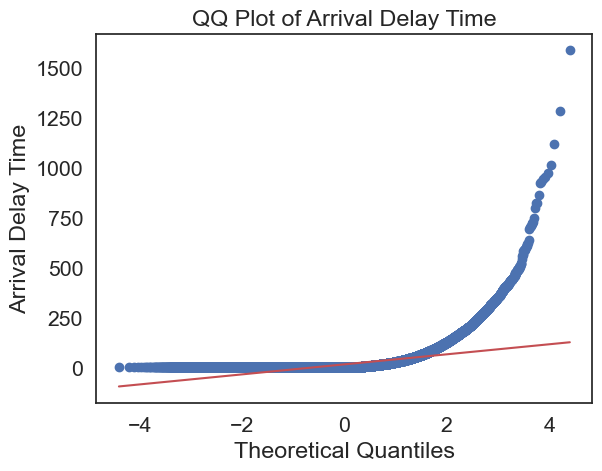

In [56]:
# Generate QQ plot for arrival delay time
stats.probplot(arrival_delay, dist="norm", plot=plt)
plt.title('QQ Plot of Arrival Delay Time')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Arrival Delay Time')
plt.show()

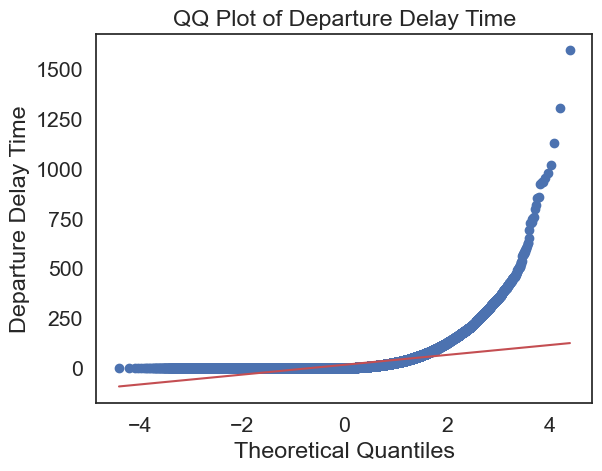

In [57]:
# Generate QQ plot for departure delay time
stats.probplot(departure_delay, dist="norm", plot=plt)
plt.title('QQ Plot of Departure Delay Time')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Departure Delay Time')
plt.show()

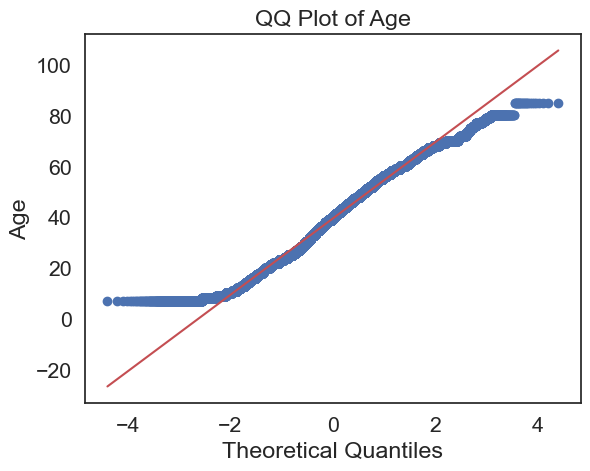

In [58]:
stats.probplot(data_test_lr['Age'], dist="norm", plot=plt)
plt.title('QQ Plot of Age')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Age')
plt.show()

 It's safe to say that the normality assumption has been broken.

### Linearity

We'll do that using a scatter plot

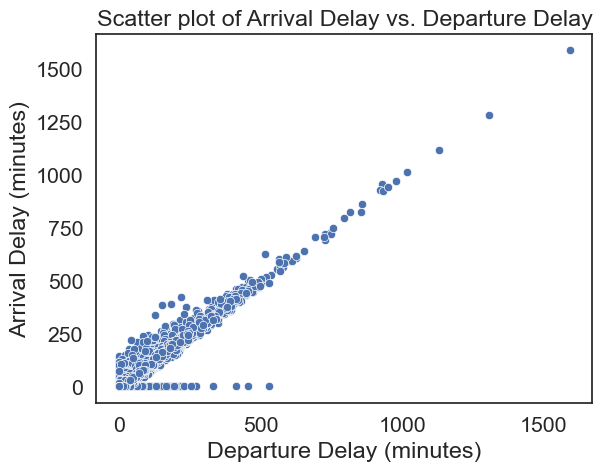

In [59]:
sns.scatterplot(x='Departure_Delay_in_Minutes', y='Arrival_Delay_in_Minutes', data=data_test_lr)

plt.title('Scatter plot of Arrival Delay vs. Departure Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

There seems to be a linear relationship between arrival delay and departure delay. We will have to remove one of them.We will have to consider other factors such as the correlation of each variable with the response variable (if you have one), potential confounding variables, and the overall fit and interpretability of your model. Additionally, you could also try including both variables in the model and see if they both contribute significantly to the model's predictive power.


___________________________________Still updating_____________________________________________

### Independence

In [60]:
data_test_lr.head()

id  Gender      Customer_Type  Age   Type_of_Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight_Distance  Inflight_wifi_service  Departure/Arrival_time_convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease_of_Online_booking  ...  Inflight_entertainment  On-board_service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg_room_service  Baggage_handling  Checkin_service  Inflight_service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

   satisfaction  
0             0  
1             0  
2             1  
3             0  
4             1  

[5 rows x 24 columns]

### Homoscedasticity

In [61]:
import statsmodels.api as sm

def plot_residuals(feature):
    # Create a copy of the DataFrame
    data = data_test_lr.copy()
    
    # Prepare the data
    X = data[[feature]]
    y = data['satisfaction']
    X = sm.add_constant(X)  # Add a constant column for the intercept
    
    # Fit the regression model
    model = sm.OLS(y, X).fit()
    
    # Calculate residuals
    residuals = model.resid
    
    # Plot residuals against predicted values
    plt.scatter(model.fittedvalues, residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {feature}')
    plt.show()

In [62]:
data_columns = ['Age', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

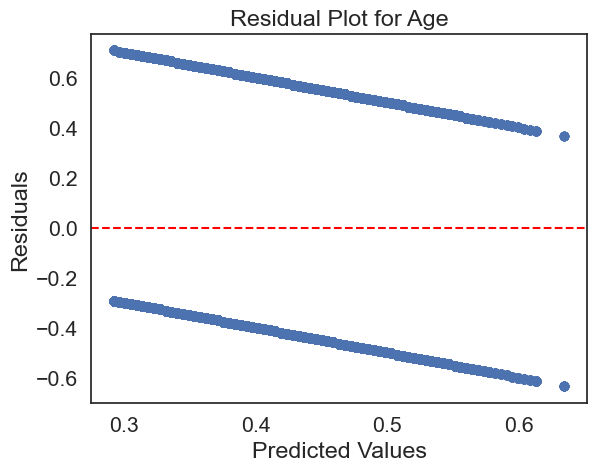

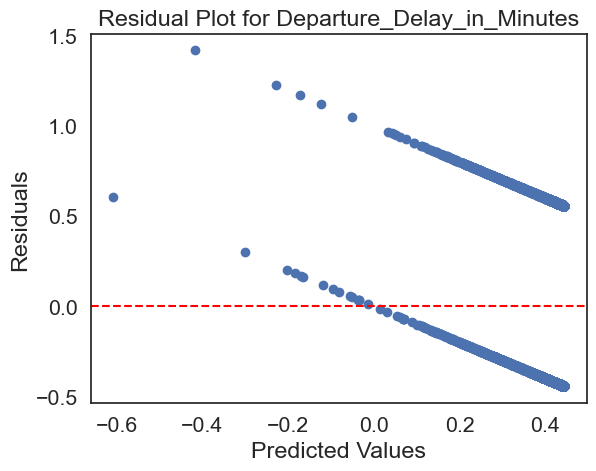

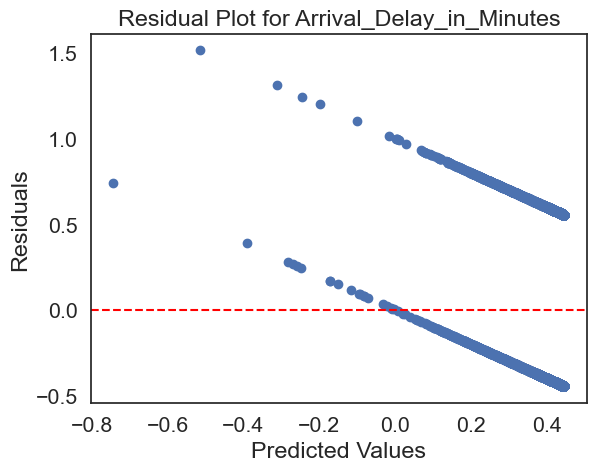

In [63]:
for c in data_columns:
    plot_residuals(c)

<h5>It is clear that there is a pattern to all the residual plots above and thus the homoscedasticity assumption is violated further on confirming our effort to just leave the linear regression model and focus on the non-linear one instead, in our case, the logistic model.</h5>

Satisfied -> no churn  
Dis or neutral -> churn(leave)

## <font color='pink'>**Feature Engineering**

In [3]:
df = pd.read_csv('output1.csv')
df.head()

Unnamed: 0      id  Gender      Customer_Type  Age   Type_of_Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight_Distance  Inflight_wifi_service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival_time_convenient  ...  Inflight_entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight_service  Cleanliness  Departure_Delay_in_Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival_Delay_in_Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

# Encoding Categorical Variables

In [6]:
def unique(C):
    for i in C:
        print(f"{i} ---> {df[i].unique()}")

In [7]:
d = df.columns

In [8]:
unique(d)

id ---> [ 70172   5047 110028 ...  37675  90086  34799]
Gender ---> ['Male' 'Female']
Customer_Type ---> ['Loyal Customer' 'disloyal Customer']
Age ---> [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
Type_of_Travel ---> ['Personal Travel' 'Business travel']
Class ---> ['Eco Plus' 'Business' 'Eco']
Flight_Distance ---> [ 460  235 1142 ... 1003 1441  884]
Inflight_wifi_service ---> [3 2 4 1 5 0]
Departure/Arrival_time_convenient ---> [4 2 5 3 1 0]
Ease_of_Online_booking ---> [3 2 5 4 1 0]
Gate_location ---> [1 3 2 5 4 0]
Food_and_drink ---> [5 1 2 4 3 0]
Online_boarding ---> [3 5 2 1 4 0]
Seat_comfort ---> [5 1 2 3 4 0]
Inflight_entertainment ---> [5 1 2 3 4 0]
On-board_service ---> [4 1 2 3 5 0]
Leg_room_service ---> [3 5 4 2 1 0]
Baggage_handling ---> [4 3 5 1 2]
Checkin_service ---> [4 1 3 5 2 0]
Inflight

In [9]:
from sklearn.preprocessing import LabelEncoder

def encode_dataframe(df):
    encoding_mapping = {}

    # Iterate over each column
    for column in df.columns:
        # Check if the column dtype is object (i.e., categorical)
        if df[column].dtype == 'object':
            # Create a LabelEncoder object
            label_encoder = LabelEncoder()
            # Fit and transform the column to obtain encoded values
            encoded_values = label_encoder.fit_transform(df[column])
            # Create a dictionary mapping original values to encoded values
            encoding_mapping[column] = dict(zip(df[column], encoded_values))
            # Replace the column values with encoded values
            df[column] = encoded_values
    
    return df, encoding_mapping

In [10]:
encoded_df, encoding_mapping = encode_dataframe(df)

encoded_df

id  Gender  Customer_Type  Age  Type_of_Travel  Class  \
0        70172       1              0   13               1      2   
1         5047       1              1   25               0      0   
2       110028       0              0   26               0      0   
3        24026       0              0   25               0      0   
4       119299       1              0   61               0      0   
...        ...     ...            ...  ...             ...    ...   
129875   78463       1              1   34               0      0   
129876   71167       1              0   23               0      0   
129877   37675       0              0   17               1      1   
129878   90086       1              0   14               0      0   
129879   34799       0              0   42               1      1   

        Flight_Distance  Inflight_wifi_service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
129875              526                      3   
129876              646                      4   
129877              828                      2   
129878             1127                      3   
129879              264                      2   

        Departure/Arrival_time_convenient  Ease_of_Online_booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
129875                                  3                       3  ...   
129876                                  4                       4  ...   
129877                                  5                       1  ...   
129878                                  3                       3  ...   
129879                                  5                       2  ...   

        Inflight_entertainment  On-board_service  Leg_room_service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
129875                       4                 3                 2   
129876                       4                 4                 5   
129877                       2                 4                 3   
129878                       4                 3                 2   
129879                       1                 1                 2   

        Baggage_handling  Checkin_service  Inflight_service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
129875                 4                4                 5            4   
129876                 5                5                 5            4   
129877                 4                5                 4            2   
129878                 5                4                 5            4   
129879          

In [11]:

# Print the encoding mapping
for column, mapping in encoding_mapping.items():
    print(f"Column: {column}")
    for original_value, encoded_value in mapping.items():
        print(f"{original_value} -> {encoded_value}")
    print()

Column: Gender
Male -> 1
Female -> 0

Column: Customer_Type
Loyal Customer -> 0
disloyal Customer -> 1

Column: Type_of_Travel
Personal Travel -> 1
Business travel -> 0

Column: Class
Eco Plus -> 2
Business -> 0
Eco -> 1

Column: satisfaction
neutral or dissatisfied -> 0
satisfied -> 1



In [12]:
df.head()

id  Gender  Customer_Type  Age  Type_of_Travel  Class  Flight_Distance  \
0   70172       1              0   13               1      2              460   
1    5047       1              1   25               0      0              235   
2  110028       0              0   26               0      0             1142   
3   24026       0              0   25               0      0              562   
4  119299       1              0   61               0      0              214   

   Inflight_wifi_service  Departure/Arrival_time_convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease_of_Online_booking  ...  Inflight_entertainment  On-board_service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg_room_service  Baggage_handling  Checkin_service  Inflight_service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

   satisfaction  
0             0  
1             0  
2             1  
3             0  
4             1  

[5 rows x 24 columns]

### <font color='pink'>**Setting dependent and response variables for feature engineering**

In [13]:
X = df.loc[:, df.columns != 'satisfaction']
y = df['satisfaction']  # Select the target variable as a Series instead of a DataFrame

# <font color='gold'>**Top 10 feature selection through Chi-square**</font>

<h5>The Chi-Square test is a statistical test(univariate feature selection method) used to determine if there is a significant association between categorical variables. In feature selection, it measures the dependency between each feature and the target variable using the χ² statistic. It selects the k features with the highest χ² scores. This method is suitable for categorical features and a categorical target variable.</h5>

In [53]:
from sklearn.feature_selection import SelectKBest, chi2
X.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes'],
      dtype='object')

In [57]:
categorical_features = X[[
        'Gender', 'Customer_Type','Type_of_Travel','Class', 'Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online_booking','Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness'
]].copy()
y_target_cat = y

In [60]:
selector = SelectKBest(chi2, k=10)
X_10_best = selector.fit_transform(categorical_features, y)

# Get the mask of selected features
selected_features_mask = selector.get_support()

# Get the names of selected features
chi_10_selected_features = categorical_features.columns[selected_features_mask]

print("The 10 most important features selected by chi-square test:")
print(chi_10_selected_features)

The 10 most important features selected by chi-square test:
Index(['Customer_Type', 'Type_of_Travel', 'Class', 'Inflight_wifi_service',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Cleanliness'],
      dtype='object')


The above are the top 10 features impacting on passenger satisfaction. We will check feature importance with other methods as well.

### <font color='yellow'>**Feature Importance using Wrapper Method(random forest)**</font>

<h5>The Wrapper Method involves training a machine learning model iteratively by considering different subsets of features. It evaluates the performance of the model with each subset of features and selects the subset that yields the best performance.</h5>

In [40]:
from sklearn.feature_selection import SelectFromModel


In [61]:

selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selected_features = selector.fit_transform(X, y)
support = selector.get_support()
wrapper_features = X.loc[:, support].columns.tolist()
print(wrapper_features)

model = rf(n_estimators=100, random_state=0)
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances)


['Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment']
id                                   0.029826
Gender                               0.003728
Customer_Type                        0.035108
Age                                  0.030020
Type_of_Travel                       0.099629
Class                                0.097405
Flight_Distance                      0.035487
Inflight_wifi_service                0.145169
Departure/Arrival_time_convenient    0.016849
Ease_of_Online_booking               0.034178
Gate_location                        0.015630
Food_and_drink                       0.010354
Online_boarding                      0.163768
Seat_comfort                         0.047860
Inflight_entertainment               0.053983
On-board_service                     0.033440
Leg_room_service                     0.033235
Baggage_handling                     0.021653
Checkin_service                      0.023300
Inflight_ser

In [111]:
s = feature_importances.sort_values(ascending=False)
sorted_features = s.keys()[:10]

In [112]:
s

Online_boarding                      0.163768
Inflight_wifi_service                0.145169
Type_of_Travel                       0.099629
Class                                0.097405
Inflight_entertainment               0.053983
Seat_comfort                         0.047860
Flight_Distance                      0.035487
Customer_Type                        0.035108
Ease_of_Online_booking               0.034178
On-board_service                     0.033440
Leg_room_service                     0.033235
Age                                  0.030020
id                                   0.029826
Cleanliness                          0.026593
Checkin_service                      0.023300
Inflight_service                     0.022528
Baggage_handling                     0.021653
Departure/Arrival_time_convenient    0.016849
Gate_location                        0.015630
Arrival_Delay_in_Minutes             0.010873
Food_and_drink                       0.010354
Departure_Delay_in_Minutes        

In [113]:
sorted_features

Index(['Online_boarding', 'Inflight_wifi_service', 'Type_of_Travel', 'Class',
       'Inflight_entertainment', 'Seat_comfort', 'Flight_Distance',
       'Customer_Type', 'Ease_of_Online_booking', 'On-board_service'],
      dtype='object')

In [46]:
wrapper_10_features = ['Online_boarding', 'Inflight_wifi_service', 'Type_of_Travel', 'Class',
       'Inflight_entertainment', 'Seat_comfort', 'Flight_Distance',
       'Customer_Type', 'Ease_of_Online_booking', 'On-board_service']

So only these six features are inherently important in contributing towards passenger satisfaction. However, we will again cross-check with another feature importance deciding method.

# Feature Permutation Importance


In [39]:
import warnings
warnings.filterwarnings("ignore")
import eli5
from eli5.sklearn import PermutationImportance

In [72]:
perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

<h5>
So here is what just happened:<br>

- Weight: The weight represents the importance of each feature. It indicates how much the performance of the model decreases when the values of that feature are randomly permuted. The higher the weight, the more important the feature is for the model's predictions.

- Feature: The feature column lists the names of the features in your dataset.

- ±: The plus-minus symbol (±) indicates the standard deviation of the weight. It represents the variability in the feature importance when the permutation process is repeated multiple times. A larger standard deviation suggests that the feature's importance is less stable.

Now, let's analyze the result:

1. Inflight_wifi_service: This feature has the highest weight (0.1466) and is considered the most important feature according to Permutation Importance. It means that if you randomly permute the values of this feature, the model's performance would decrease significantly.

2. Type_of_Travel: This feature has the second-highest weight (0.1350). It is another important feature for the model's predictions.

3. Customer_Type: This feature has a weight of 0.0532, indicating its importance but to a lesser extent than the previous two features.

4. Online_boarding: This feature has a weight of 0.0411, suggesting it has some impact on the model's predictions.

5. Class: This feature has a weight of 0.0339, indicating its importance but to a lesser extent than the previous features.

The weights continue to decrease for the remaining features, indicating their decreasing importance.

The ± values associated with each weight represent the standard deviation of the feature's importance. For example, the weight for Inflight_wifi_service is given as 0.1466 ± 0.0008, which means that when the permutation process is repeated, the weight can vary within the range of (0.1466 - 0.0008) to (0.1466 + 0.0008). A smaller ± value suggests higher stability and consistency in the feature importance ranking.
</h5>

In [53]:
permutation_features = ['Inflight_wifi_service', 'Type_of_Travel', 'Customer_Type', 
                        'Online_boarding', 'Class', 'Checkin_service', 'Seat_comfort', 'Baggage_handling', 
                        'Inflight_service', 'Cleanliness']

From all above results, finally we can combine and conclude the list of important features.

<u>*Really Important Featurues*</u>: Type_of_Travel, Inflight_wifi_service, Online_boarding, Seat_comfort

<u>*Important Features*</u>: Class, Flight_Distance, Inflight_entertainment, On-board_service, Leg_room_service, Cleanliness, Checkin_service, Inflight_service, Baggage_handling

### <font color='violet'>**Feature Importance via Decision Tree**</font>


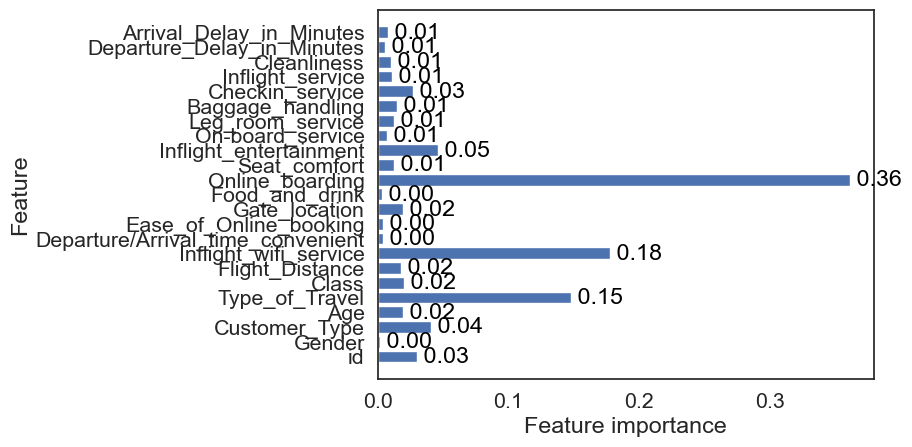

In [151]:
def plot_feature_importances_cancer(model, feature_names):
    n_features = len(feature_names)
    feature_importances = model.feature_importances_
    
    plt.barh(range(n_features), feature_importances, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

    for i, v in enumerate(feature_importances):
        plt.text(v, i, f" {v:.2f}", color='black', va='center')

# Assuming you have the following variables: tree, X_train_tree, y_train_tree, and df
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train_tree, y_train_tree)

# Call the plot_feature_importances_cancer function
plot_feature_importances_cancer(tree, X.columns)
plt.show()


In [14]:
selected_dt = ["Online_boarding", "Inflight_wifi_service", "Type_of_Travel"]

### <font color='orange'>**Recursive Feature Elimination**</font>

<h5>
RFE is an iterative feature selection method that starts with all features and progressively eliminates the least important features based on their coefficients or importance scores.
It utilizes the logistic regression model to assess the importance of each feature and recursively prunes the least important features until the desired number of features is reached.
</h5>

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [154]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(logreg, n_features_to_select=10)
rfe.fit(X_scaled, y)

selected_features_rfe = X.columns[rfe.support_].tolist()
selected_features_rfe

['Customer_Type',
 'Type_of_Travel',
 'Class',
 'Inflight_wifi_service',
 'Ease_of_Online_booking',
 'Online_boarding',
 'On-board_service',
 'Leg_room_service',
 'Checkin_service',
 'Cleanliness']

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression


In [33]:
def backward_selection(X, y, k_features=10):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    estimator = LogisticRegression()
    selector = RFE(estimator, n_features_to_select=k_features, step=1)
    selector = selector.fit(X_scaled, y)
    selected_features = X.columns[selector.support_].tolist()
    return selected_features

def forward_selection(X, y, k_features=10):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    estimator = LogisticRegression()
    selector = SequentialFeatureSelector(estimator, n_features_to_select=k_features, direction='forward')
    selector = selector.fit(X_scaled, y)
    selected_features = X.columns[selector.support_].tolist()
    return selected_features


In [34]:
backward_features = backward_selection(X, y, k_features=10)
forward_features = forward_selection(X, y, k_features=10)

In [38]:
forward_features

['Customer_Type',
 'Type_of_Travel',
 'Inflight_wifi_service',
 'Gate_location',
 'Online_boarding',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Checkin_service',
 'Cleanliness']

In [44]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [35]:

def stepwise_selection(X, y, k_features=10):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    estimator = LogisticRegression()
    selector = SequentialFeatureSelector(estimator, k_features=k_features, forward=True, floating=True, scoring='accuracy', cv=5)
    selector = selector.fit(X_scaled, y)
    selected_features = X.columns[list(selector.k_feature_idx_)].tolist()
    return selected_features

In [36]:
stepwise_features = stepwise_selection(X, y, k_features=10)

## **RFE via CV**

In [45]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Perform Recursive Feature Elimination with Cross-Validation (RFE-CV)
rfe = RFECV(estimator=logreg)
rfe.fit(X_scaled, y)

# Get the selected features
selected_features_rfe = X.columns[rfe.support_].tolist()
print("Stepwise Selected Features (RFE-CV):", selected_features_rfe)

Stepwise Selected Features (RFE-CV): ['id', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online_booking', 'Online_boarding', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']


In [46]:
from sklearn.ensemble import RandomForestClassifier as rf

#### <font color='red'>**Putting all the feature selection methods into a class for better code abstraction**</font>

In [ ]:
class FeatureSelections:
    def __init__(self):
        self.scaler = StandardScaler()
        self.estimator = LogisticRegression(max_iter=1000)
        self.model = rf(n_estimators=100, random_state=0)
    
    def chi_square(self, X, y, k=10):
        X_scaled = self.scaler.fit_transform(X)
        
        selector = SelectKBest(chi2, k=k)
        X_best = selector.fit_transform(X_scaled, y)
        selected_features_mask = selector.get_support()
        selected_features = X.columns[selected_features_mask]
        return selected_features
    
    def wrapper_method(self, X, y):
        X_scaled = self.scaler.fit_transform(X)
        
        selector = SelectFromModel(self.model)
        selector.fit_transform(X_scaled, y)
        support = selector.get_support()
        features = X.loc[:, support].columns.tolist()
        return features
    
    def permutation_method(self, X, y):
        model = rf(n_estimators=100, random_state=0).fit(X,y)
        perm = PermutationImportance(model, random_state=1).fit(X_scaled, y)
        weights = eli5.show_weights(perm, feature_names=X.columns.tolist())
        return weights
    
    def rfe(self, X, y, n_features_to_select=10):
        X_scaled = self.scaler.fit_transform(X)
        
        rfe = RFE(self.estimator, n_features_to_select=n_features_to_select)
        rfe.fit(X_scaled, y)
        selected_features = X.columns[rfe.support_].tolist()
        return selected_features
    
    def backward_selection(self, X, y, k_features=10):
        X_scaled = self.scaler.fit_transform(X)
        
        selector = RFE(self.estimator, n_features_to_select=k_features, step=1)
        selector = selector.fit(X_scaled, y)
        selected_features = X.columns[selector.support_].tolist()
        return selected_features
    
    def forward_selection(self, X, y, k_features=10):
        X_scaled = self.scaler.fit_transform(X)
        
        selector = SequentialFeatureSelector(self.estimator, n_features_to_select=k_features, direction='forward')
        selector = selector.fit(X_scaled, y)
        selected_features = X.columns[selector.support_].tolist()
        return selected_features
    
    def stepwise_selection(self, X, y, k_features=10):
        X_scaled = self.scaler.fit_transform(X)
        
        selector = SequentialFeatureSelector(self.estimator, k_features=k_features, forward=True, floating=True, scoring='accuracy', cv=5)
        selector = selector.fit(X_scaled, y)
        selected_features = X.columns[list(selector.k_feature_idx_)].tolist()
        return selected_features



In [ ]:
# Create an instance of the FeatureSelections class
fs = FeatureSelections()

# Perform chi-square feature selection
selected_features_chi2 = fs.chi_square(X, y, k=10)
print("Selected features (chi-square):", selected_features_chi2)

# Perform wrapper method feature selection
selected_features_wrapper = fs.wrapper_method(X, y)
print("Selected features (wrapper method):", selected_features_wrapper)

# Perform permutation feature importance method
permutation_results = fs.permutation_method(X, y)
print("Permutation feature importance results:\n", permutation_results)

# Perform Recursive Feature Elimination (RFE)
selected_features_rfe = fs.rfe(X, y, n_features_to_select=10)
print("Selected features (RFE):", selected_features_rfe)

# Perform backward selection
backward_features = fs.backward_selection(X, y, k_features=10)
print("Selected features (backward selection):", backward_features)

# Perform forward selection
forward_features = fs.forward_selection(X, y, k_features=10)
print("Selected features (forward selection):", forward_features)

# Perform stepwise selection
stepwise_features = fs.stepwise_selection(X, y, k_features=10)
print("Selected features (stepwise selection):", stepwise_features)


In [228]:
chi_sq = ['Customer_Type', 'Type_of_Travel', 'Class', 'Inflight_wifi_service',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Cleanliness']

decision_tree = ["Online_boarding", "Inflight_wifi_service", "Type_of_Travel"]

random_forest = ['Online_boarding', 'Inflight_wifi_service', 'Type_of_Travel', 'Class',
       'Inflight_entertainment', 'Seat_comfort', 'Flight_Distance',
       'Customer_Type', 'Ease_of_Online_booking', 'On-board_service']
permutation_features = ['Inflight_wifi_service', 'Type_of_Travel', 'Customer_Type', 
                        'Online_boarding', 'Class', 'Checkin_service', 'Seat_comfort', 'Baggage_handling', 
                        'Inflight_service', 'Cleanliness']

RFE = ['Customer_Type', 'Type_of_Travel','Class','Inflight_wifi_service','Ease_of_Online_booking','Online_boarding','On-board_service','Leg_room_service','Checkin_service','Cleanliness']
backward = backward_features 
forward = forward_features
stepwise = stepwise_features

In [230]:
lists_of_features_selected = [
    chi_sq, decision_tree, random_forest, permutation_features, RFE, backward, forward, stepwise
]

In [217]:
def find_intersection_and_union(list_of_lists):

    intersection = set(list_of_lists[0])
    for lst in list_of_lists[1:]:
        intersection = intersection.intersection(lst)
    intersection_list = list(intersection)

    union = set()
    for lst in list_of_lists:
        union = union.union(lst)
    union_list = list(union)

    return intersection_list, union_list

In [219]:
intersection, union = find_intersection_and_union(lists_of_features_selected)
print("Intersection:", intersection)
print("Union:", union)

Intersection: ['Type_of_Travel', 'Inflight_wifi_service', 'Online_boarding']
Union: ['Checkin_service', 'Cleanliness', 'Ease_of_Online_booking', 'Inflight_service', 'Online_boarding', 'Inflight_wifi_service', 'On-board_service', 'Gate_location', 'Customer_Type', 'Class', 'Inflight_entertainment', 'Flight_Distance', 'Baggage_handling', 'Leg_room_service', 'Type_of_Travel', 'Seat_comfort']


### <u>**Identifying confounding variables, colliders, and overdispersion**</u>

##### <font color='pink'>**Confounding variables**

<h5><b><u><font color='turquoise'>Our hypotheses</font></b></h5></u>

1. Age: Age may be associated with both the predictor variables (e.g., Gender, Type of Travel, Class) and customer satisfaction. For example, different age groups may have varying preferences or expectations when it comes to airline experiences.

2. Type of Travel: The purpose of travel (Personal or Business) may be associated with both the predictor variables (e.g., Gender, Class) and customer satisfaction. Business travelers, for instance, might have different satisfaction levels compared to personal travelers due to their specific needs and expectations.

3. Class: The class of travel (Eco Plus, Business, Eco) could be a confounding variable as it may be associated with both the predictor variables (e.g., Gender, Type of Travel) and customer satisfaction. Different classes may offer distinct services or amenities that can impact satisfaction levels.

#### <u>**1. Goal: Study the effect of age on customer satisfaction**

#### **Correlation Analysis**

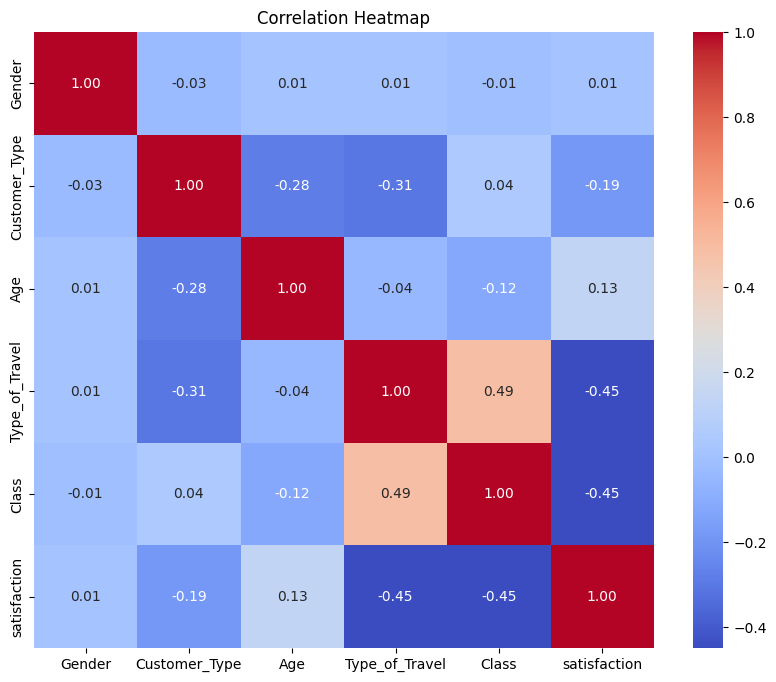

In [112]:
# Select the relevant columns from the dataframe
selected_columns = ['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'satisfaction']
selected_data = df[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### **Multivariate Analysis**

In [158]:
# Prepare the data
X_1 = df[['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', ]]
y_1 = df['satisfaction']

In [159]:
def is_confounder(A, b, var):
    # Add intercept to the predictors
    A = sm.add_constant(A)

    # Fit the logistic regression model with all predictor variables
    model_all = sm.Logit(b, A).fit()

    # Check the summary of the model
    print(model_all.summary())

    # Create a new dataset without the Age variable
    A_without_feature = A.drop(var, axis=1)

    # Fit the logistic regression model without the Age variable
    model_without_feature = sm.Logit(b, A_without_feature).fit()

    # Check the summary of the model without Age
    print(model_without_feature.summary())

    # Compare the coefficients
    coeff_all = model_all.params
    coeff_without_feature = model_without_feature.params

    # Check the change in coefficients
    coefficient_change = coeff_all - coeff_without_feature

    # Print the change in coefficients
    print(f"""
    Changes in coefficients:
    {coefficient_change}""")


In [160]:
D = {
    "Age": [X_1, y_1],
    "Type_of_Travel": [X_1, y_1],
    "Class": [X_1, y_1]
}

In [161]:
feat = list(D.keys())
feat

['Age', 'Type_of_Travel', 'Class']

In [162]:
for f in feat:
    print(f"Cofounder detection: {f}")
    is_confounder(X_1, y_1,f)

Cofounder detection: Age
Optimization terminated successfully.
         Current function value: 0.487258
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:               129880
Model:                          Logit   Df Residuals:                   129874
Method:                           MLE   Df Model:                            5
Date:                Tue, 23 May 2023   Pseudo R-squ.:                  0.2882
Time:                        15:12:15   Log-Likelihood:                -63285.
converged:                       True   LL-Null:                       -88907.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.2055      0.026     46.611      0.000       1.155     

### <font color='orange'><b>Confounder detection</b></font>

1. <font color='red'><b>Age</b></font>
   - Model with Age:
     - Coefficient estimate: -0.0005
     - P-value: 0.382

   - Model without Age:
     - Coefficient estimate: NaN (Not a Number)
     - P-value: N/A

   <b>Conclusion</b>: Based on the coefficient estimate and p-value, Age does not appear to be a confounder. Removing Age from the model does not significantly affect the coefficients of the other variables, indicating that it does not have a confounding effect on the relationship between the other variables and satisfaction.

2. <font color='red'><b>Type_of_Travel</b></font>
   - Model with Type_of_Travel:
     - Coefficient estimate: -2.4586
     - P-value: 0.000

   - Model without Type_of_Travel:
     - Coefficient estimate: NaN
     - P-value: N/A

  <b>Conclusion</b>: Type_of_Travel seems to be a confounder. The coefficient estimate for Type_of_Travel is significant in the model with all variables, but becomes NaN when Type_of_Travel is removed. This suggests that Type_of_Travel has a confounding effect on the relationship between the other variables and satisfaction.

3. <font color='red'><b>Class</b></font>
   - Model with Class:
     - Coefficient estimate: -0.9358
     - P-value: 0.000

   - Model without Class:
     - Coefficient estimate: NaN
     - P-value: N/A

   <b>Conclusion</b>: Class appears to be a confounder. The coefficient estimate for Class is significant in the model with all variables, but becomes NaN when Class is removed. This indicates that Class has a confounding effect on the relationship between the other variables and satisfaction.

<font color='gold'><b>Based on the analysis, Age is not a confounder, while both Type_of_Travel and Class can be considered confounders. Therefore, from now on, we will not include Age in our combined features and it's pretty logical that id should also not be in there.</b></font>

##### <font color='pink'>**Colliders**

In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  int32  
 2   Customer_Type                      129880 non-null  int32  
 3   Age                                129880 non-null  int64  
 4   Type_of_Travel                     129880 non-null  int32  
 5   Class                              129880 non-null  int32  
 6   Flight_Distance                    129880 non-null  int64  
 7   Inflight_wifi_service              129880 non-null  int64  
 8   Departure/Arrival_time_convenient  129880 non-null  int64  
 9   Ease_of_Online_booking             129880 non-null  int64  
 10  Gate_location                      129880 non-null  int64  
 11  Food_and_drink                     1298

##### <font color='pink'>**Overdispersion**

##### <font color='pink'>**Collapsibility**

In [21]:
X.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes'],
      dtype='object')

## <u><font color='turquoise'>**Dimensionality reduction**</font></u>

In [114]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

PCA's unsupervised algorithm assumed that all the variables are of the same scale, so if one variable is on a different scale then another, it will dominate the PCA procedure.

In [115]:
scaler_ = StandardScaler()

standardized_X = scaler_.fit_transform(X)

In [116]:
standardized_X

array([[ 0.13953224,  1.01487815, -0.47342178, ...,  1.30448651,
         0.27018709,  0.07690856],
       [-1.5974528 ,  1.01487815,  2.11228136, ..., -1.74040158,
        -0.36021434, -0.23545962],
       [ 1.20255375, -0.98533997, -0.47342178, ...,  1.30448651,
        -0.38648106, -0.39164371],
       ...,
       [-0.72721329, -0.98533997, -0.47342178, ..., -0.97917956,
        -0.38648106, -0.39164371],
       [ 0.6706696 ,  1.01487815, -0.47342178, ...,  0.54326449,
        -0.38648106, -0.39164371],
       [-0.80392069, -0.98533997, -0.47342178, ..., -1.74040158,
        -0.38648106, -0.39164371]])

In [117]:
pca_obj = PCA(10)

In [118]:
pca_obj.fit(standardized_X)

PCA(n_components=10)

In [119]:
B = pca_obj.transform(standardized_X)

In [120]:
B

array([[-1.26831112,  0.80204596,  0.41115793, ...,  0.53482682,
        -1.1350883 , -0.09225826],
       [ 3.14789033, -0.80932371, -1.5942083 , ...,  0.09192927,
        -0.61439148,  0.06164429],
       [-2.44220669,  1.88891286,  0.99261589, ..., -0.38745373,
         0.1862164 ,  0.14777967],
       ...,
       [ 2.02552794, -0.59767668, -1.95532333, ...,  0.06262676,
         1.45686492, -2.18548781],
       [-1.52113949,  0.30697589, -0.32806357, ...,  1.36837224,
        -0.56101749, -0.65755339],
       [ 4.36052003, -1.9287342 ,  2.24329876, ..., -0.01345721,
         1.7222234 , -0.06698603]])

In [121]:
explained_variance_ratio = pca_obj.explained_variance_ratio_
explained_variance_ratio

array([0.1771697 , 0.1036714 , 0.09619687, 0.08534864, 0.07764866,
       0.06536261, 0.04520356, 0.04417896, 0.04184641, 0.03859754])

In [124]:
type(explained_variance_ratio)


numpy.ndarray

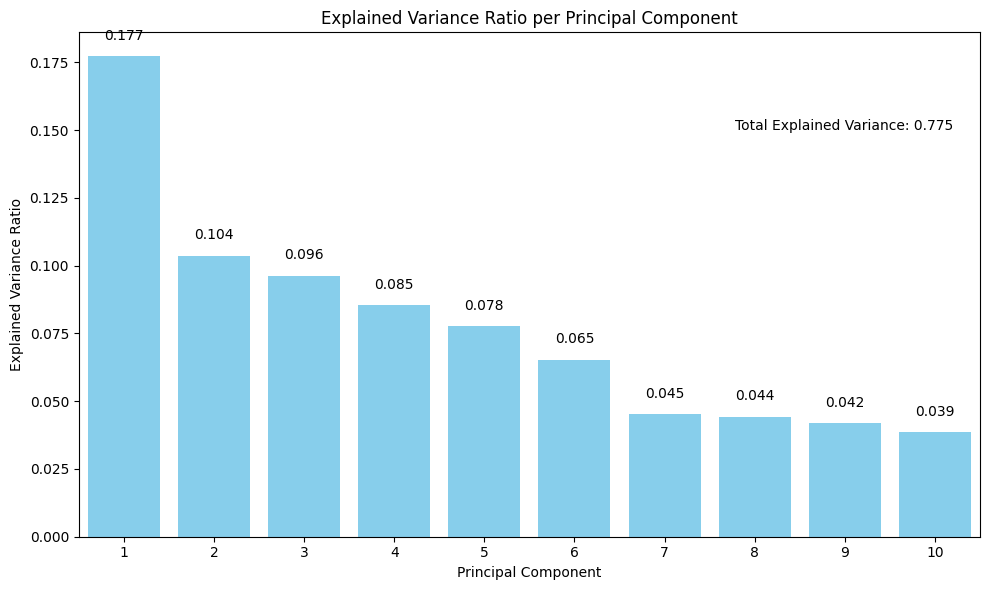

In [126]:
# Sort the explained variance ratio in descending order
sorted_variance_ratio = np.sort(explained_variance_ratio)[::-1]

# Create a larger figure
plt.figure(figsize=(10, 6))

# Create a bar chart
plt.bar(range(1, len(sorted_variance_ratio) + 1), sorted_variance_ratio, color='skyblue')

# Set the x-axis limits and ticks
plt.xlim(0.5, len(sorted_variance_ratio) + 0.5)
plt.xticks(range(1, len(sorted_variance_ratio) + 1))

# Add labels and title
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')

# Add text annotations for each bar
for i, ratio in enumerate(sorted_variance_ratio):
    plt.text(i + 1, ratio + 0.005, f'{ratio:.3f}', ha='center', va='bottom')

# Calculate the total explained variance ratio
total_variance_ratio = np.sum(sorted_variance_ratio)

# Add a text box displaying the total explained variance ratio
text_box = f'Total Explained Variance: {total_variance_ratio:.3f}'
plt.text(len(sorted_variance_ratio) + 0.2, 0.15, text_box, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [127]:
Projected_data = pca_obj.transform(standardized_X)

In [128]:
Projected_data.shape

(129880, 10)

### Below is the features we are concerned with

In [ ]:
f = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling', 'Class']

In [25]:
Union

['Age',
 'Cleanliness',
 'Inflight_entertainment',
 'Customer_Type',
 'On-board_service',
 'id',
 'Ease_of_Online_booking',
 'Online_boarding',
 'Seat_comfort',
 'Checkin_service',
 'Type_of_Travel',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes',
 'Baggage_handling',
 'Inflight_wifi_service',
 'Flight_Distance',
 'Class',
 'Leg_room_service',
 'Inflight_serice']

In [27]:
features

['Inflight_wifi_service',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'Leg_room_service',
 'Inflight_service',
 'Class']

In [26]:
features = ['Inflight_wifi_service','Online_boarding','Seat_comfort',
            'Inflight_entertainment','Leg_room_service',
            'Inflight_service', 'Class']
target = ['satisfaction']

# <font color='red'><u>**Model Creation & Evaluation**</u></font>

<h5>When splitting data for training machine learning algorithms, it is generally recommended to use the same split each time for consistent evaluation and comparison of models</h5>


In [198]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <font color='yellow'>**This is our evaluation function**

In [94]:
import time
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if not verbose:
        model.fit(X_train, y_train.ravel(), verbose=0)
    else:
        model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    time_taken = time.time() - t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))
    
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap=plt.cm.pink)
    classes_to_plot = list(set(y_test))  # Exclude micro-average class index
    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), classes_to_plot=classes_to_plot, plot_micro=False)
    
    return model, accuracy, roc_auc, time_taken

In [139]:
import time
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

def run_model_1(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if not verbose:
        model.fit(X_train, y_train.ravel(), verbose=0)
    else:
        model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    time_taken = time.time() - t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {} seconds".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))
    
    # Calculate TN, TP, FP, FN
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    confusion_matrix_values = [[tn, fp], [fn, tp]]
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap=plt.cm.Greens)
    
    # Add values of TN, TP, FP, FN to the confusion matrix plot
    plt.text(0, 0, "TN = {}\nFP = {}\nFN = {}\nTP = {}".format(tn, fp, fn, tp), color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'), fontsize=12)
    
    classes_to_plot = list(set(y_test))  # Exclude micro-average class index
    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), classes_to_plot=classes_to_plot, plot_micro=False)
    
    return model, accuracy, roc_auc, time_taken


### <font color='turquoise'>**Model-0: Linear Regression**</font>

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [199]:
# Create and train the linear regression model
model_0 = LinearRegression()
model_0.fit(X_train, y_train)

# Predict on the test set
y_pred = model_0.predict(X_test)

# Calculate the test score (R-squared)
test_score = r2_score(y_test, y_pred)

# Print the test score
print("Test Score (R-squared):", test_score)

# Get the feature coefficients
feature_coefficients = model_0.coef_.tolist()
features = X.columns
D = {}

Test Score (R-squared): 0.5504614421337664


In [201]:
feature_coefficients

[-4.068727828198676e-07,
 0.009410196335645318,
 -0.3178884591160339,
 -0.0009496364875129632,
 -0.4030880342679367,
 -0.08578250837183836,
 5.309841977286889e-06,
 0.06607589363776749,
 -0.01689629974981316,
 -0.041606946172833996,
 0.0043219164147309365,
 -0.004327209019582896,
 0.08075290438312964,
 0.010080650616427819,
 0.01274888251966335,
 0.03655973703374375,
 0.03277771124259006,
 0.01773267641229581,
 0.03836806594249107,
 0.01609641734554455,
 0.026052799203006228,
 0.000519378777583331,
 -0.001046607893432702]

In [186]:
model_0.coef_

array([-4.63145744e-07,  8.33183502e-03, -3.21480841e-01, -9.49635000e-04,
       -4.02558140e-01, -8.41515702e-02,  5.33429784e-06,  6.66029339e-02,
       -1.70200087e-02, -4.04896068e-02,  3.00782713e-03, -4.25377509e-03,
        8.10871920e-02,  9.37239611e-03,  1.26993298e-02,  3.52459056e-02,
        3.30862167e-02,  1.84075329e-02,  3.85850989e-02,  1.68659163e-02,
        2.57389238e-02,  4.80654958e-04, -1.00090110e-03])

### Important !!

<h5>Here is an example generated and how you guys can interpret each metric to guage our logistic model. Remember that </h5>

In [253]:
from sklearn.metrics import classification_report

In [254]:
# Split the data into training and testing sets
X_train10, X_test10, y_train10, y_test10 = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model_all = LogisticRegression(max_iter=1000)
model_all.fit(X_train10, y_train10)

# Make predictions on the test set
y_pred10 = model_all.predict(X_test10)


# Get the coefficients and intercept
coefficients = model_all.coef_
intercept = model_all.intercept_



# Generate the classification report
report = classification_report(y_test10, y_pred10)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79     14622
           1       0.73      0.75      0.74     11354

    accuracy                           0.77     25976
   macro avg       0.77      0.77      0.77     25976
weighted avg       0.77      0.77      0.77     25976



<h5>
The classification report provides detailed evaluation metrics for each class in the binary classification problem. Here's a breakdown of the metrics in the classification report:

Precision:
- Precision for class 0 (dissatisfied or neutral): The precision is 0.80, which means that out of all the instances predicted as class 0, 80% were correctly classified as dissatisfied or neutral.
- Precision for class 1 (satisfied): The precision is 0.73, indicating that 73% of the instances predicted as class 1 were correctly classified as satisfied.

Recall:
- Recall for class 0: The recall is 0.79, which means that out of all the actual instances of dissatisfied or neutral customers, 79% were correctly identified.
- Recall for class 1: The recall is 0.75, indicating that 75% of the actual instances of satisfied customers were correctly identified.

F1-score:
- F1-score for class 0: The F1-score is 0.79, which is the harmonic mean of precision and recall for class 0. It provides a balanced measure of the model's performance in correctly identifying dissatisfied or neutral customers.
- F1-score for class 1: The F1-score is 0.74, representing the harmonic mean of precision and recall for class 1. It provides a balanced measure of the model's performance in correctly identifying satisfied customers.

Support:
- Support for class 0: The support is 14,622, which indicates the number of instances in the test set that belong to class 0 (dissatisfied or neutral).
- Support for class 1: The support is 11,354, representing the number of instances in the test set that belong to class 1 (satisfied).

Accuracy:
- Accuracy: The overall accuracy of the model is 0.77, which means that 77% of the instances in the test set were correctly classified.

Macro Average:
- The macro average takes the average of precision, recall, and F1-score across all classes. In this case, the macro average precision, recall, and F1-score are all 0.77.

Weighted Average:
- The weighted average calculates the metrics by weighting them based on the support of each class. It provides an overall measure of the model's performance, considering the class imbalance. The weighted average precision, recall, and F1-score are all 0.77.

In summary, the classification report shows that the model has reasonably good performance with a balanced F1-score for both classes. The model achieved an accuracy of 0.77, indicating that it correctly classified 77% of the instances. However, it's important to consider the specific requirements of your application and compare these metrics against a baseline or other models to assess if further improvement is needed.
</h5>

In [98]:
feature_names = X.columns

print("Coefficients:")
for feature, coefficient in zip(feature_names, coefficients[0]):
    print(f"{feature}: {coefficient}")

print("Intercept:")
print(intercept)

Coefficients:
id: -8.77949259170884e-06
Gender: -0.05329256896409193
Customer_Type: -0.12585558656578885
Age: -0.01805182471211326
Type_of_Travel: -0.32062956878932497
Class: -0.43242148880519066
Flight_Distance: 0.00032179498457151896
Inflight_wifi_service: 0.18445466660556634
Departure/Arrival_time_convenient: -0.4435514005636447
Ease_of_Online_booking: -0.02516177920990662
Gate_location: -0.33934401584557944
Food_and_drink: -0.08779605368759812
Online_boarding: 0.5026284816406886
Seat_comfort: 0.1458082466371974
Inflight_entertainment: 0.23028230886904183
On-board_service: 0.12924939637213084
Leg_room_service: 0.12011386120096997
Baggage_handling: -0.0664844086106489
Checkin_service: 0.008658291065319406
Inflight_service: -0.08261523103598355
Cleanliness: 0.07545904792753348
Departure_Delay_in_Minutes: 0.0054804680458038334
Arrival_Delay_in_Minutes: -0.011108956948422991
Intercept:
[-0.12987788]


### <font color='turquoise'>**Model-1: Normal Logistic Regression(all features)**</font>

In [135]:
from sklearn.linear_model import LogisticRegression

In [255]:
# Create a logistic regression model
model_1 = LogisticRegression(C=1e100)

# Train the model
model_1.fit(X_train, y_train)

LogisticRegression(C=1e+100)

Accuracy = 0.6824761318139821
ROC Area under Curve = 0.6834127836644018
Time taken = 0.9849996566772461 seconds
              precision    recall  f1-score   support

           0    0.73794   0.67597   0.70560     14622
           1    0.62343   0.69086   0.65541     11354

    accuracy                        0.68248     25976
   macro avg    0.68069   0.68341   0.68051     25976
weighted avg    0.68789   0.68248   0.68366     25976



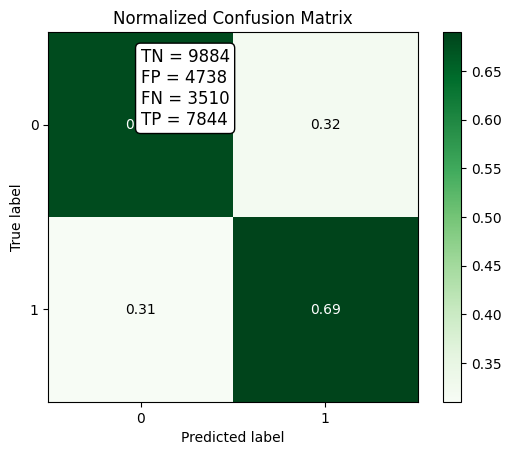

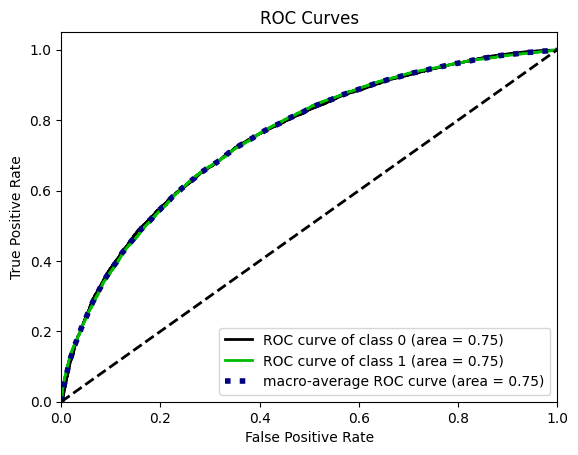

In [256]:
model_1, accuracy_1, roc_auc_1, tt_1 = run_model(model_1, X_train, y_train, X_test, y_test)

### <b>Traininig unregularized logistic regression on lists of features selected</b>

In [263]:
def train_unregularized_logistic_models(model, features):
    # Select the specified features from the training and test sets
    X_train_selected = X_train[features].copy()
    X_test_selected = X_test[features].copy()

    # Create and train the logistic regression model
    model_log = model
    model_log.fit(X_train_selected, y_train)

    # Predict on the test set
    y_pred = model_log.predict(X_test_selected)
    run_model_1(model_log, X_train_selected, y_train, X_test_selected, y_test)
    return model_log

In [264]:
lists_of_features_selected = [
    chi_sq, decision_tree, random_forest, permutation_features, RFE, backward, forward, stepwise
]
names = ['chi_square', 'decision_tree', 'random_forest', 'permutation', 'RFE', 'backward', 'forward', 'stepwise']

--------------------------------
Information for chi_square
--------------------------------
Accuracy = 0.8637203572528488
ROC Area under Curve = 0.8596192605113845
Time taken = 0.4120302200317383 seconds
              precision    recall  f1-score   support

           0    0.86915   0.89222   0.88053     14622
           1    0.85628   0.82702   0.84140     11354

    accuracy                        0.86372     25976
   macro avg    0.86272   0.85962   0.86097     25976
weighted avg    0.86353   0.86372   0.86343     25976

--------------------------------
Information for decision_tree
--------------------------------
Accuracy = 0.8458577148136741
ROC Area under Curve = 0.8408492809233649
Time taken = 0.11203122138977051 seconds
              precision    recall  f1-score   support

           0    0.85075   0.88066   0.86545     14622
           1    0.83902   0.80104   0.81959     11354

    accuracy                        0.84586     25976
   macro avg    0.84489   0.84085   0.842

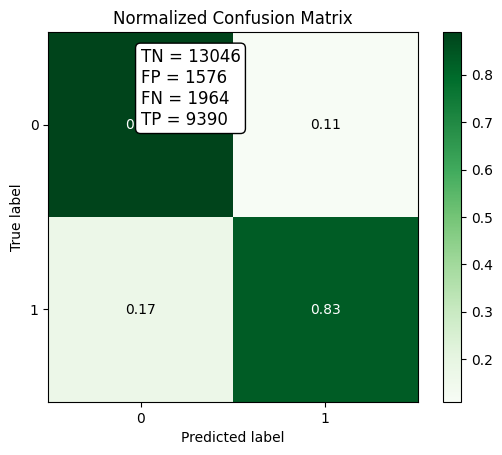

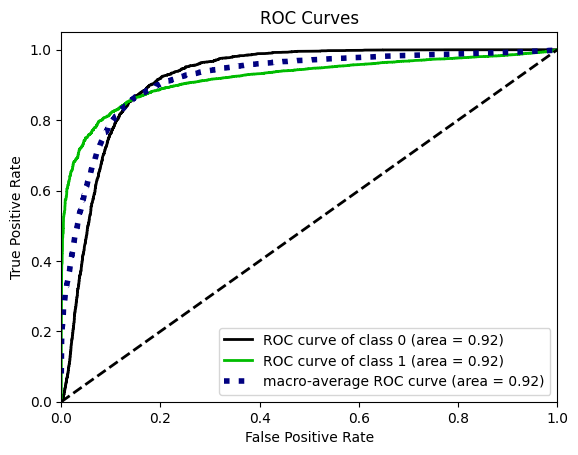

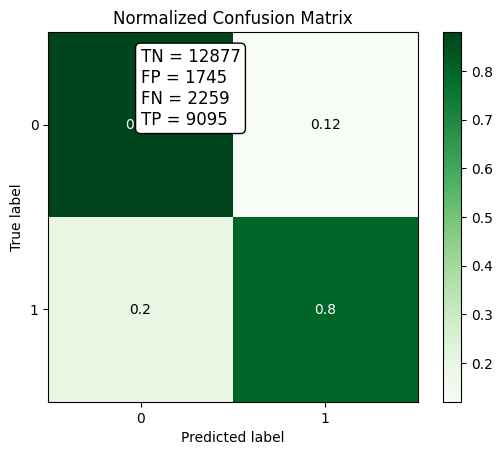

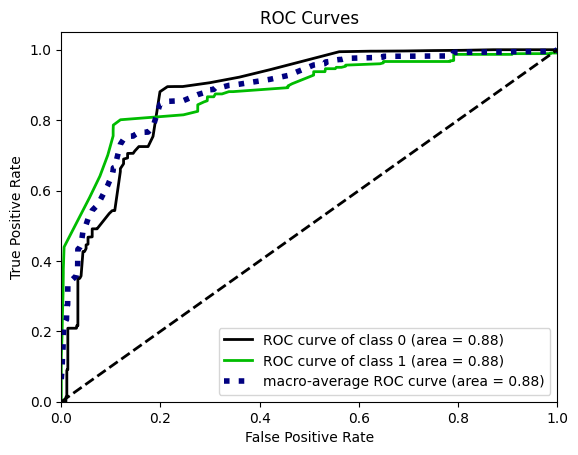

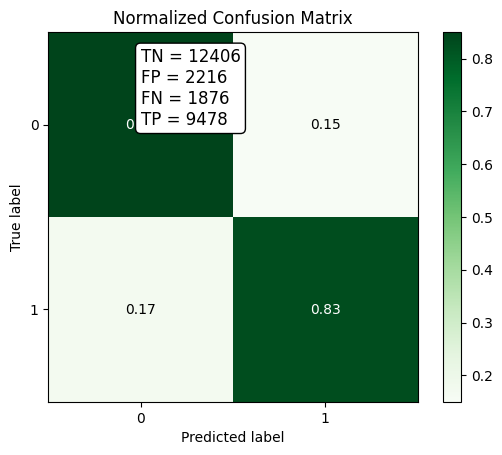

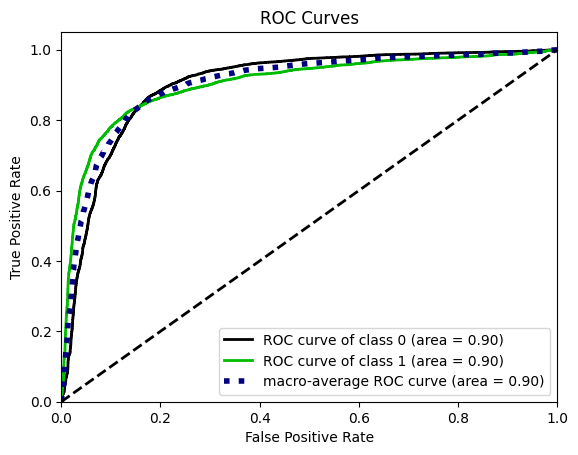

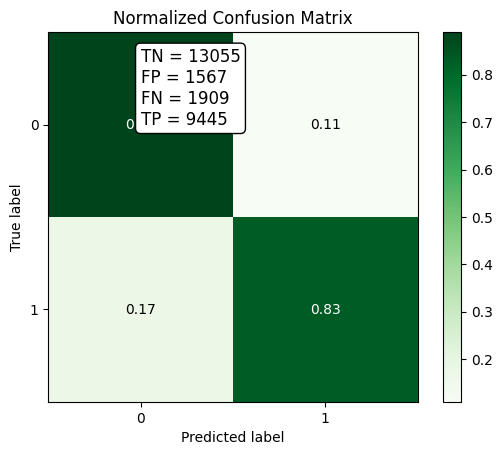

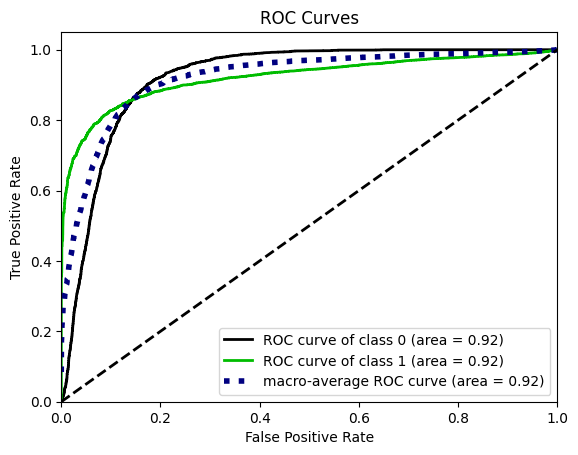

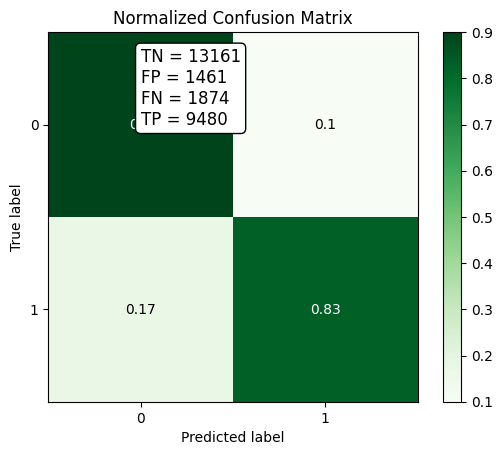

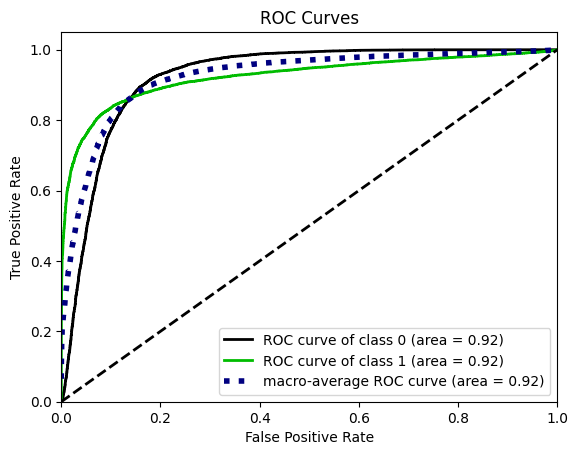

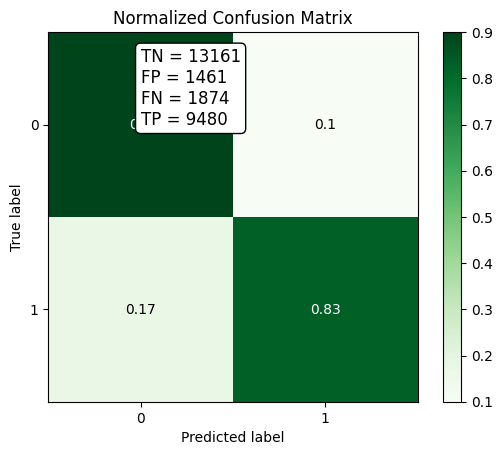

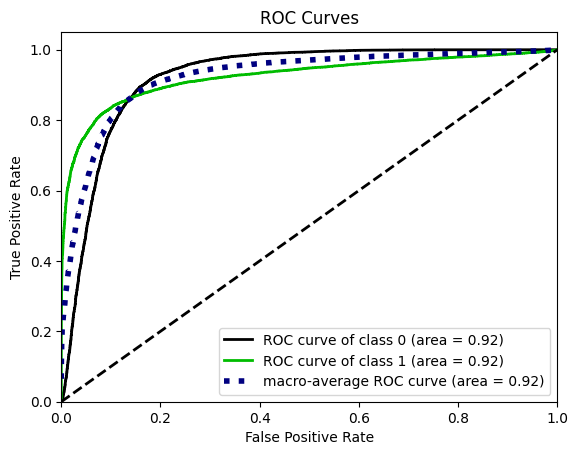

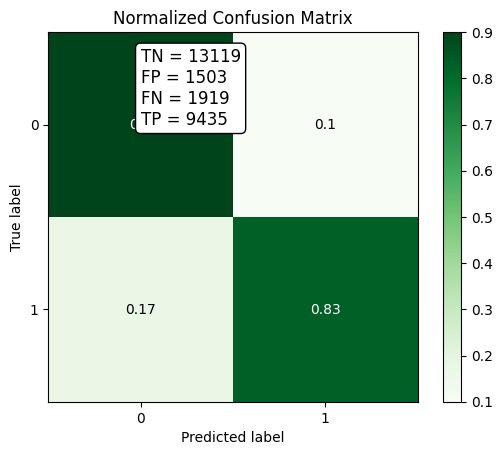

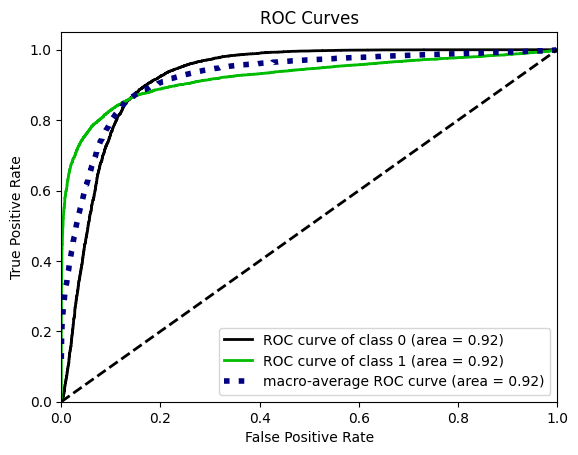

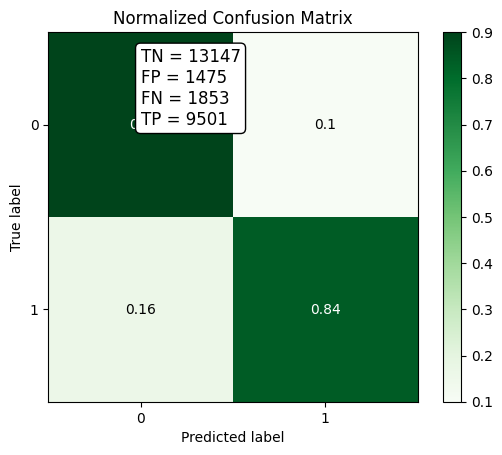

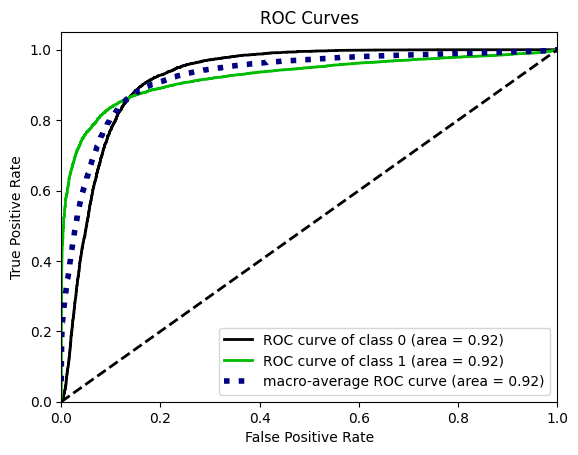

In [266]:
M_unregularized = []
for i in range(len(lists_of_features_selected)):
    print("--------------------------------")
    print(f"Information for {names[i]}")
    print("--------------------------------")
    M_unregularized.append(    train_unregularized_logistic_models(model=LogisticRegression(C=1e10), features=lists_of_features_selected[i]))

In [268]:
M_unregularized[0]

LogisticRegression(C=10000000000.0)

#### <font color='orange'>**Model-2: Logistic Regression penalized with Lasso (regularization_strength = 0.1)**</font>

Accuracy = 0.8760009239297813
ROC Area under Curve = 0.8720924059236209
Time taken = 1.4579730033874512 seconds
              precision    recall  f1-score   support

           0    0.87975   0.90316   0.89130     14622
           1    0.87086   0.84103   0.85568     11354

    accuracy                        0.87600     25976
   macro avg    0.87531   0.87209   0.87349     25976
weighted avg    0.87587   0.87600   0.87573     25976



(LogisticRegression(C=0.1, penalty='l1', solver='liblinear'),
 0.8760009239297813,
 0.8720924059236209,
 1.4579730033874512)

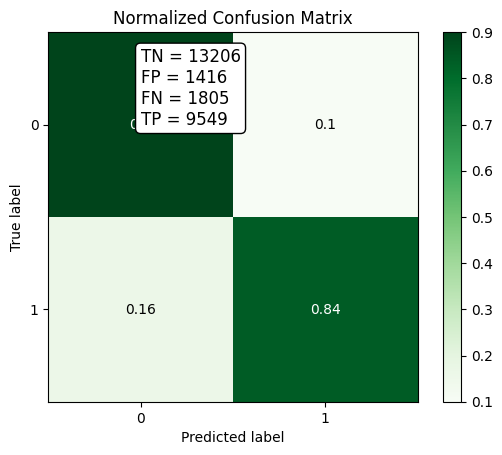

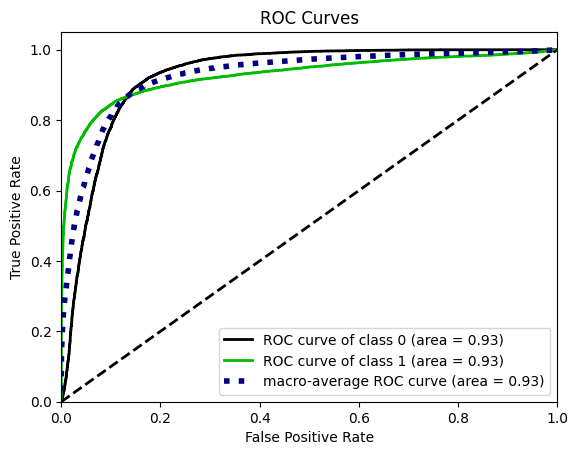

In [238]:
model_2 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
model_2.fit(X_train, y_train)
run_model_1(model_2, X_train, y_train, X_test, y_test)

#### <font color='orange'>**Model-3: Logistic Regression penalized with Ridge (L2 penalty = 50%)**</font>

Accuracy = 0.8503618724976901
ROC Area under Curve = 0.8483539586638543
Time taken = 2.2230007648468018 seconds
              precision    recall  f1-score   support

           0    0.86913   0.86431   0.86671     14622
           1    0.82650   0.83239   0.82944     11354

    accuracy                        0.85036     25976
   macro avg    0.84781   0.84835   0.84807     25976
weighted avg    0.85049   0.85036   0.85042     25976



(LogisticRegression(C=0.1, solver='liblinear'),
 0.8503618724976901,
 0.8483539586638543,
 2.2230007648468018)

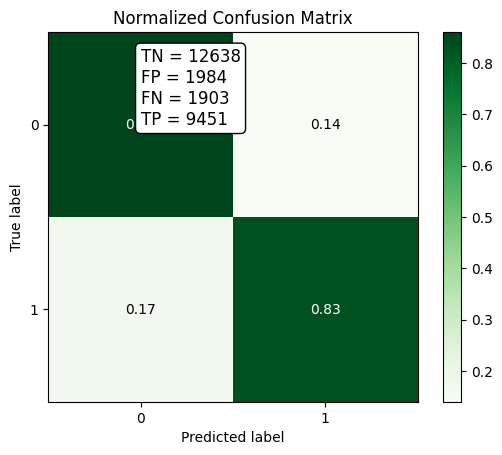

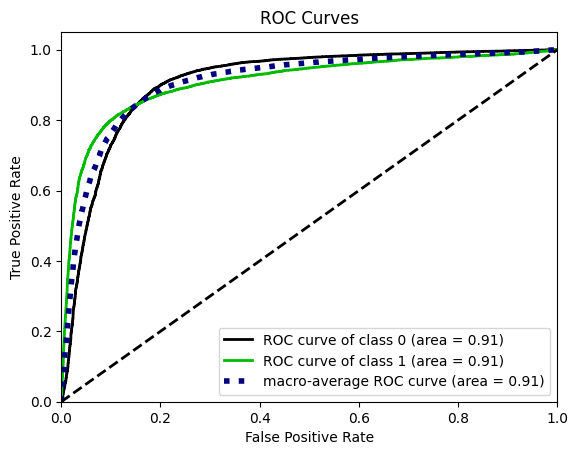

In [241]:
model_3 = LogisticRegression(penalty='l2', solver='liblinear', C=0.1)
model_3.fit(X_train, y_train)
run_model_1(model_3, X_train, y_train, X_test, y_test)

#### <font color='orange'>**Model-4: Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)**</font>

Accuracy = 0.6131429011395134
ROC Area under Curve = 0.600696093611141
Time taken = 7.519938230514526 seconds
              precision    recall  f1-score   support

           0    0.64392   0.69963   0.67062     14622
           1    0.56467   0.50176   0.53136     11354

    accuracy                        0.61314     25976
   macro avg    0.60430   0.60070   0.60099     25976
weighted avg    0.60928   0.61314   0.60975     25976



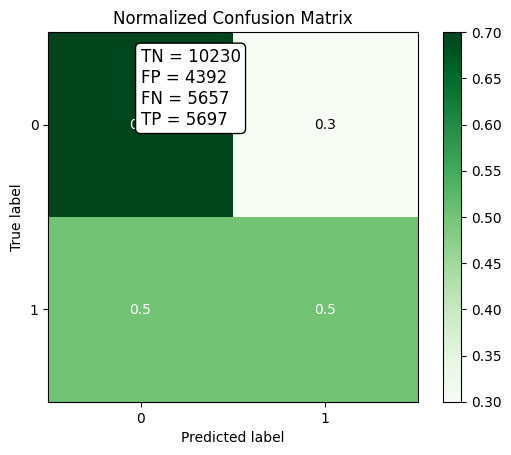

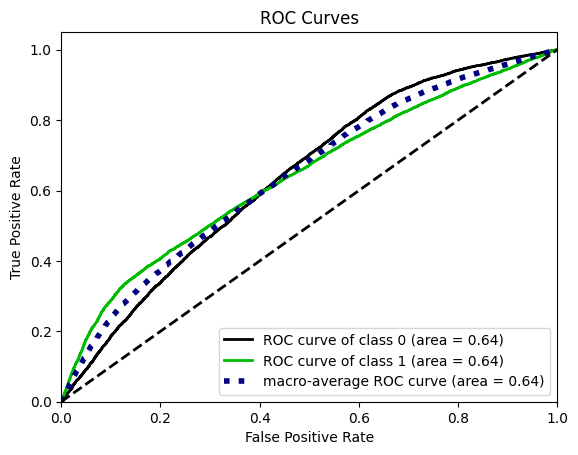

In [248]:
params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.6, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr, C=0.01)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model_1(model_lr, X_train, y_train, X_test, y_test)

### <font color='gold'>**Model-5: Decision Tree**</font>

In [250]:
from sklearn.tree import DecisionTreeClassifier

Accuracy = 0.9471820141669233
ROC Area under Curve = 0.9459782563100856
Time taken = 0.8245549201965332 seconds
              precision    recall  f1-score   support

           0    0.95086   0.95555   0.95320     14622
           1    0.94239   0.93641   0.93939     11354

    accuracy                        0.94718     25976
   macro avg    0.94663   0.94598   0.94629     25976
weighted avg    0.94716   0.94718   0.94716     25976



(DecisionTreeClassifier(),
 0.9471820141669233,
 0.9459782563100856,
 0.8245549201965332)

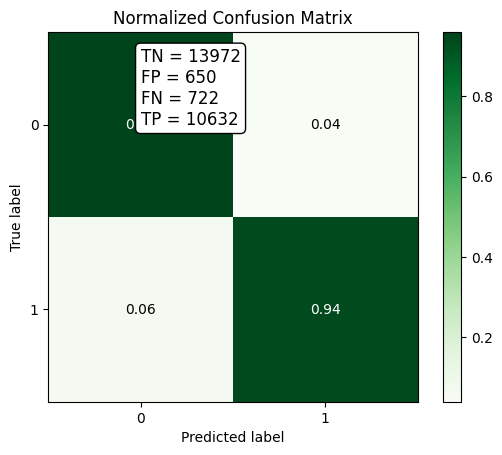

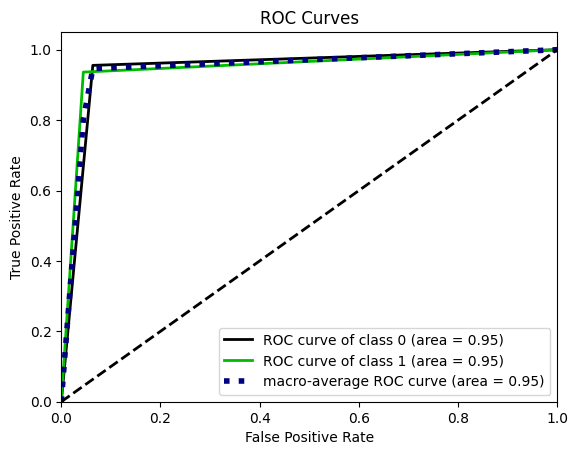

In [251]:
# Create a decision tree classifier
model_5 = DecisionTreeClassifier()

# Train the model
model_5.fit(X_train, y_train)
run_model_1(model_5, X_train, y_train, X_test, y_test)

### <font color='gold'>**Model-6: Random Forest**</font>

Accuracy = 0.9615414228518633
ROC Area under Curve = 0.9589396976191548
Time taken = 14.038161754608154 seconds
              precision    recall  f1-score   support

           0    0.95334   0.97962   0.96630     14622
           1    0.97279   0.93826   0.95521     11354

    accuracy                        0.96154     25976
   macro avg    0.96307   0.95894   0.96076     25976
weighted avg    0.96184   0.96154   0.96146     25976



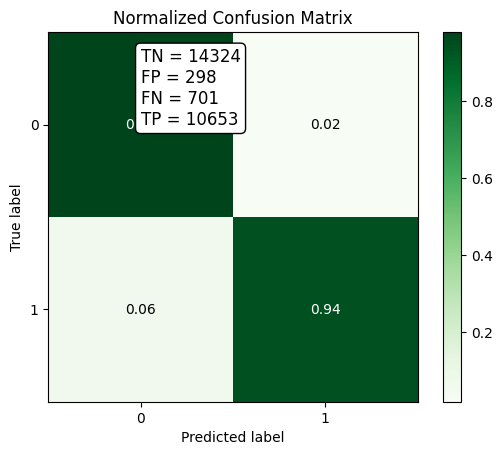

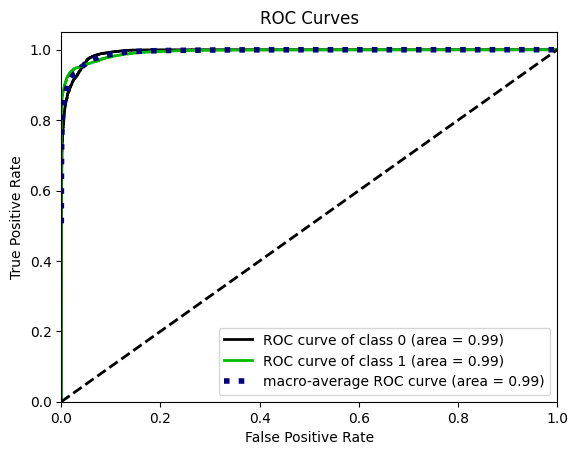

In [234]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model_1(model_rf, X_train, y_train, X_test, y_test)

### <b>Objective</b>
- <b><font color='yellow'>Can we accurately predict when our airline customer will churn or will not?</font></b> **--------->** <b><font color='yellow'>can we build a model to do so?</font></b> **----------->** <b><font color='yellow'>what sort of features are we going to have to include in the model?</font></b>


<h5>Whether a customer is satisfied or dissatisfied, can we find the factors/features that push them to be so?</h5>

Update: still no exact answer to the above question....

### Comparison between all models(not including unregularized) in one go!!!!

In [270]:
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.metrics import roc_auc_score

def compare_models(models, X_test, y_test):
    model_names = []
    auc_scores = []

    for i, model in enumerate(models):
        model_name = f"Model {i+1}"
        model_names.append(model_name)

        # Make predictions
        y_pred_prob = model.predict_proba(X_test)[:, 1]

        # Calculate AUC score
        auc = roc_auc_score(y_test, y_pred_prob)
        auc_scores.append(auc)

        # Plot ROC curve
        skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), title=f"ROC Curve - {model_name}")

    # Plot AUC comparison
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, auc_scores)
    plt.xlabel("Model")
    plt.ylabel("AUC Score")
    plt.title("AUC Comparison")
    plt.show()

    # Print AUC scores
    for model_name, auc_score in zip(model_names, auc_scores):
        print(f"{model_name}: AUC = {auc_score}")

In [278]:
# Define the models
models = [
    model_1,
    model_2,
    model_3,
    model_lr,
    model_5,
    model_rf
]

In [277]:
M_unregularized

[LogisticRegression(C=10000000000.0),
 LogisticRegression(C=10000000000.0),
 LogisticRegression(C=10000000000.0),
 LogisticRegression(C=10000000000.0),
 LogisticRegression(C=10000000000.0),
 LogisticRegression(C=10000000000.0),
 LogisticRegression(C=10000000000.0),
 LogisticRegression(C=10000000000.0)]

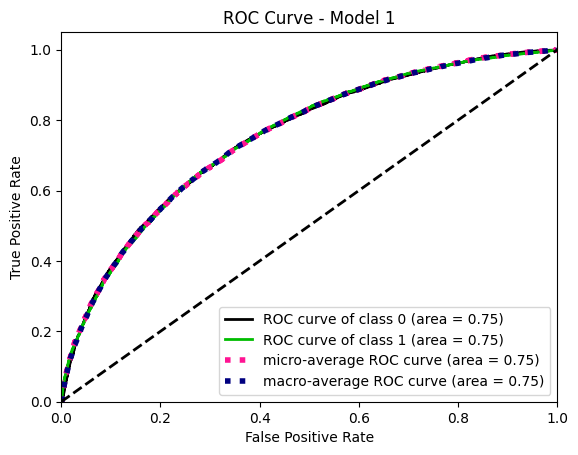

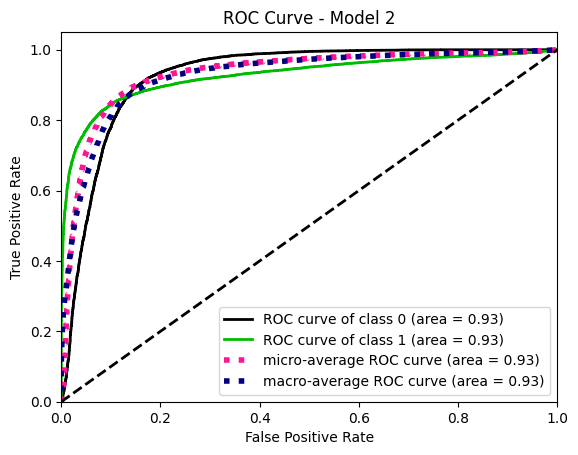

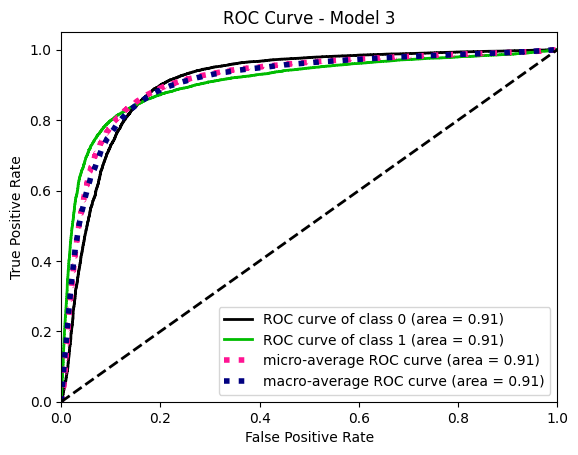

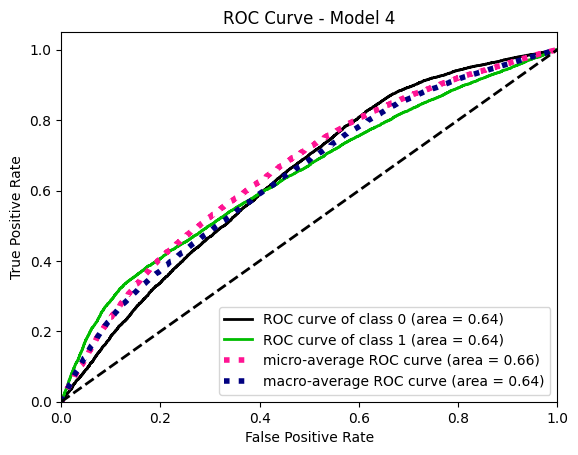

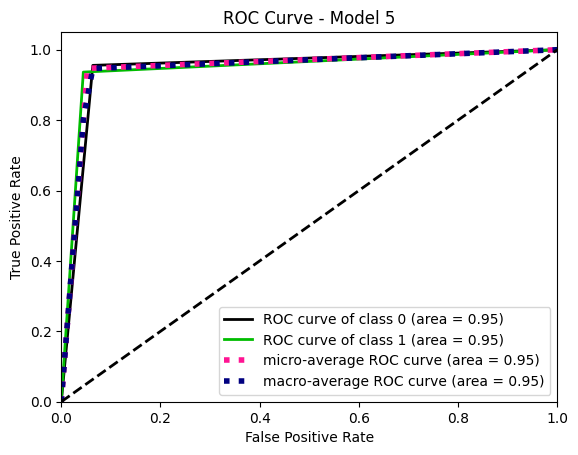

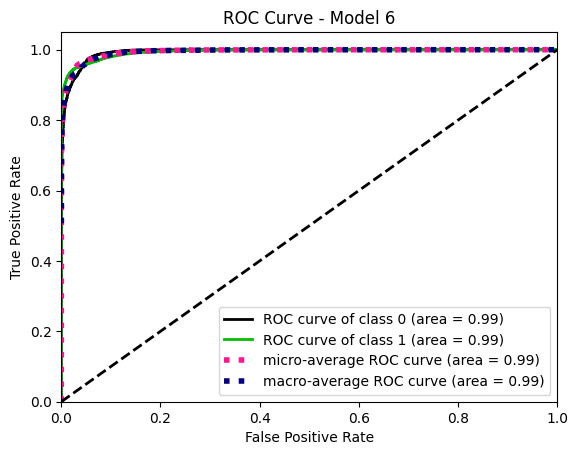

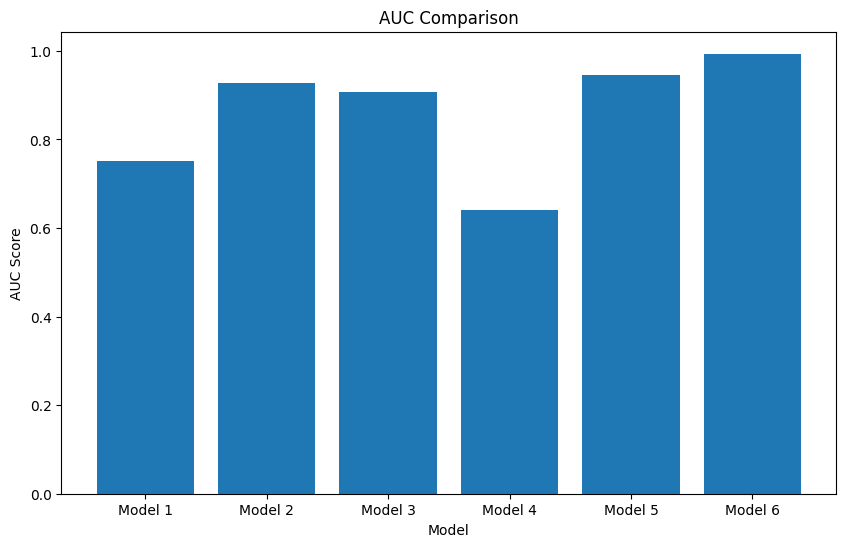

Model 1: AUC = 0.7506861718066697
Model 2: AUC = 0.9267654577702052
Model 3: AUC = 0.9079386048955072
Model 4: AUC = 0.6412692385246368
Model 5: AUC = 0.9459782563100856
Model 6: AUC = 0.9935930212658386


In [279]:
# Call the function to compare models
compare_models(models, X_test, y_test)

## <center>**Conclusion**</center>